# ML PCF 4


TEST DATA

no of rings - 4  \
diameter of pitch - 0.75 \
total data points - 10

In [ ]:
import time
start_time = time.time()
print('start_time: ', start_time)

start_time:  1750435950.4034624


In [ ]:
import matplotlib
#matplotlib.use('TkAgg')      ----- GUI -------
#from matplotlib.backends.backend_tkagg import FigureCanvasAgg
#import matplotlib.backends.tkagg as tkagg
import tkinter as Tk


import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import sys
import pickle
import torch
from torch import nn, optim
from torchvision import transforms
from collections import OrderedDict

In [ ]:
# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
## Transforms features by scaling each feature to a given range.
## This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.
## This transformation is often used as an alternative to zero mean, unit variance scaling.
## fit(X[, y])	Compute the minimum and maximum to be used for later scaling.
## transform(X)	Scaling features of X according to feature_range.
## fit_transform(X[, y])	Fit to data, then transform it.
## inverse_transform(X)	Undo the scaling of X according to feature_range.
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

In [ ]:
no_of_output_nodes = 5

df_1 = pd.read_excel('pcf_modeSoln_data_1.xlsx', sheet_name='SiO2-air-rings-5-dBYp-0.7')
df_1.head(5)

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-\nrings,diaBYpitch,pitch\n(um),wl\n(um),neff,Aeff\n(um^2),dispersion\n(ps/km.nm),conf-loss\n(dB/cm),conf-loss-in-log10\n(dB/cm)
0,1.444,1,5,0.7,0.8,1.80000,1.27882,4.42229,-667.351,61.270000,1.787248
1,1.444,1,5,0.7,0.8,1.58333,1.29642,2.41020,-728.993,8.273760,0.917703
2,1.444,1,5,0.7,0.8,1.41322,1.31464,1.67653,-586.632,0.766277,-0.115614
3,1.444,1,5,0.7,0.8,1.27612,1.33194,1.33156,-397.929,0.061124,-1.213790
4,1.444,1,5,0.7,0.8,1.16327,1.34753,1.13874,-230.017,0.004892,-2.310525


In [ ]:
datafile_1 = df_1.values                  # stored data from xlsx file
print(datafile_1)

[[ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -6.67351000e+02
   6.12700000e+01  1.78724788e+00]
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -7.28993000e+02
   8.27376000e+00  9.17702919e-01]
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -5.86632000e+02
   7.66277000e-01 -1.15614210e-01]
 ...
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ...  6.65287000e+01
   1.36981000e-21 -2.08633397e+01]
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ...  6.46671000e+01
  -2.90294000e-22 -2.15371619e+01]
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ...  6.28979000e+01
  -1.66804000e-21 -2.07777935e+01]]


In [ ]:
print(len(datafile_1))

140


In [ ]:
# Define the sheet names
sheets_names = [
    'SiO2-air-rings-4-dBYp-0.8', 'SiO2-air-rings-4-dBYp-0.9',
    'SiO2-air-rings-4-dBYp-0.7', 'SiO2-air-rings-5-dBYp-0.6',
    'SiO2-air-rings-5-dBYp-0.8', 'SiO2-air-rings-5-dBYp-0.9',
    'SiO2-air-rings-4-dBYp-0.6', 'SiO2-air-rings-5-dBYp-0.7'
]

# Initialize an empty list to store data from each sheet
data_list = []

# Read data from each sheet and append it to the list
for sheet_name in sheets_names:
    print(f"Processing sheet: {sheet_name}")
    try:
        df_sheet = pd.read_excel('pcf_modeSoln_data_1.xlsx', sheet_name=sheet_name)
        data_list.append(df_sheet.values)  # Convert to NumPy array and store
    except Exception as e:
        print(f"Error reading sheet '{sheet_name}': {e}")

# Combine all data into a single NumPy array
if data_list:
    datafile_1 = np.concatenate(data_list, axis=0)
    print(datafile_1)
    print(f"Total rows: {len(datafile_1)}")
else:
    print("No data found in the specified sheets.")


Processing sheet: SiO2-air-rings-4-dBYp-0.8
Processing sheet: SiO2-air-rings-4-dBYp-0.9
Processing sheet: SiO2-air-rings-4-dBYp-0.7
Processing sheet: SiO2-air-rings-5-dBYp-0.6
Processing sheet: SiO2-air-rings-5-dBYp-0.8
Processing sheet: SiO2-air-rings-5-dBYp-0.9
Processing sheet: SiO2-air-rings-4-dBYp-0.6
Processing sheet: SiO2-air-rings-5-dBYp-0.7
[[ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ... -8.70710000e+02
   7.35079000e+01  1.86633402e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ... -8.22296000e+02
   9.05190000e+00  9.56739747e-01]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ... -5.85559000e+02
   8.26585000e-01 -8.27124801e-02]
 ...
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ...  6.65287000e+01
   1.36981000e-21 -2.08633397e+01]
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ...  6.46671000e+01
  -2.90294000e-22 -2.15371619e+01]
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ...  6.28979000e+01
  -1.66804000e-21 -2.07777935e+01]]
Total rows: 

In [ ]:
########   just to see output variable values   ##########
out_var_datafile_1 = datafile_1[:,range(6,11)]              ## stored output_variable (4th column) from xlsx file
out_var_datafile_1 = out_var_datafile_1.reshape((-1,no_of_output_nodes))    ## one column with unknown no. of rows
print(out_var_datafile_1)
print('no. of training points: ', len(out_var_datafile_1))

[[ 1.22988000e+00  2.84514000e+00 -8.70710000e+02  7.35079000e+01
   1.86633402e+00]
 [ 1.25509000e+00  1.69051000e+00 -8.22296000e+02  9.05190000e+00
   9.56739747e-01]
 [ 1.27991000e+00  1.26185000e+00 -5.85559000e+02  8.26585000e-01
  -8.27124801e-02]
 ...
 [ 1.46352000e+00  3.38857000e+00  6.65287000e+01  1.36981000e-21
  -2.08633397e+01]
 [ 1.46401000e+00  3.37276000e+00  6.46671000e+01 -2.90294000e-22
  -2.15371619e+01]
 [ 1.46445000e+00  3.35827000e+00  6.28979000e+01 -1.66804000e-21
  -2.07777935e+01]]
no. of training points:  1118


In [ ]:
scaler1.fit(datafile_1)
scaler2.fit(out_var_datafile_1)


scaler_datafile_1 = scaler1.transform(datafile_1)
X = scaler_datafile_1[:,range(0,6)]                 ## input variables columns
y = scaler_datafile_1[:,range(6,11)]                          ## output variables columns

print(X)
print()
print(y)

[[0.         0.         0.         0.66666667 0.         1.        ]
 [0.         0.         0.         0.66666667 0.         0.83333077]
 [0.         0.         0.         0.66666667 0.         0.70247692]
 ...
 [0.         0.         1.         0.33333333 1.         0.03164538]
 [0.         0.         1.         0.33333333 1.         0.01519769]
 [0.         0.         1.         0.33333333 1.         0.        ]]

[[1.88333850e-01 4.62786788e-01 1.98941845e-01 3.96958062e-01
  9.83732227e-01]
 [2.75243907e-01 2.39469995e-01 2.30592367e-01 4.88821566e-02
  9.46855280e-01]
 [3.60809460e-01 1.56562937e-01 3.85358544e-01 4.46373219e-03
  9.04713606e-01]
 ...
 [9.93794601e-01 5.67891492e-01 8.11659126e-01 9.36557312e-22
  6.22213914e-02]
 [9.95483849e-01 5.64833683e-01 8.10442110e-01 9.27592403e-22
  3.49031583e-02]
 [9.97000724e-01 5.62031175e-01 8.09285500e-01 9.20152286e-22
  6.56896192e-02]]


In [ ]:
X, y = shuffle(X, y)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.1)
X_train = X_train.reshape(-1, 6)                                ## 2nd column value is = no. of input variables columns
y_train = y_train.reshape(-1, no_of_output_nodes)               ## 2nd column value is = no. of output variables columns
X_validation = X_validation.reshape(-1, 6)                      ## 2nd column value is = no. of input variables columns
y_validation = y_validation.reshape(-1, no_of_output_nodes)     ## 2nd column value is = no. of output variables columns
print('no. of training points: ', len(X_train))
print('no. of validation points: ', len(X_validation))

no. of training points:  1006
no. of validation points:  112


In [ ]:
###########     manual testing    #########
df_2 = pd.read_excel('pcf_modeSoln_data_manual_1.xlsx', sheet_name='Sheet1')
datafile_2 = df_2.values                  ## stored data from xlsx file
print(datafile_2)

[[ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.70000000e+00  1.38489000e+00  3.04184000e+00
   4.29646000e+01  1.54506000e-04 -3.81105465e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.60000000e+00  1.39268000e+00  2.90433000e+00
   6.67628000e+01  3.24724000e-05 -4.48848561e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.50000000e+00  1.40035000e+00  2.78024000e+00
   8.64249000e+01  6.02749000e-06 -5.21986350e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.40000000e+00  1.40784000e+00  2.66742000e+00
   1.02097000e+02  9.78811000e-07 -6.00930116e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.30000000e+00  1.41511000e+00  2.56412000e+00
   1.14007000e+02  1.37772000e-07 -6.86083904e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  

In [ ]:
scaler_datafile_2 = scaler1.transform(datafile_2)
X_test = scaler_datafile_2[:,range(0,6)]            ## input variables columns
y_test = scaler_datafile_2[:,range(6,11)]                     ## output variables columns
print(X_test)
print()
print(y_test)
print('no. of test points: ', len(X_test))

[[0.         0.         0.         0.33333333 0.58333333 0.92307692]
 [0.         0.         0.         0.33333333 0.58333333 0.84615385]
 [0.         0.         0.         0.33333333 0.58333333 0.76923077]
 [0.         0.         0.         0.33333333 0.58333333 0.69230769]
 [0.         0.         0.         0.33333333 0.58333333 0.61538462]
 [0.         0.         0.         0.33333333 0.58333333 0.53846154]
 [0.         0.         0.         0.33333333 0.58333333 0.46153846]
 [0.         0.         0.         0.33333333 0.58333333 0.38461538]
 [0.         0.         0.         0.33333333 0.58333333 0.30769231]
 [0.         0.         0.         0.33333333 0.58333333 0.23076923]]

[[7.22722102e-01 5.00830502e-01 7.96254159e-01 8.34364773e-07
  7.53558435e-01]
 [7.49577688e-01 4.74234716e-01 8.11812168e-01 1.75357764e-07
  7.26093898e-01]
 [7.76019581e-01 4.50234490e-01 8.24666213e-01 3.25497089e-08
  6.96442234e-01]
 [8.01840935e-01 4.28413993e-01 8.34911806e-01 5.28578449e-09
  6.64

In [ ]:
X_test = X_test.reshape(-1, 6)                      ## 2nd column value is = no. of input variables columns
y_test = y_test.reshape(-1, no_of_output_nodes)     ## 2nd column value is = no. of output variables columns

In [ ]:
input_dim = 6                                       ## = no. of input variables columns
output_dim = no_of_output_nodes                     ## = no. of output variables columns
from collections import OrderedDict

In [ ]:
############     model with dropout - 3 layers    #####################
####             dropout_prob leads to variations in mse curve      #########
dropout_prob = 0.0
nodes_hidden_1 = 100
nodes_hidden_2 = 50
nodes_hidden_3 = 25
## nn.Linear() is fully connected layer
model = nn.Sequential(OrderedDict([
                        ('fc1', nn.Linear(input_dim, nodes_hidden_1)),
                        ('relu', nn.ReLU()),
                        ('dropout', nn.Dropout(dropout_prob)),
                        ('fc2', nn.Linear(nodes_hidden_1, nodes_hidden_2)),
                        ('relu', nn.ReLU()),
                        ('dropout', nn.Dropout(dropout_prob)),
                        ('fc3', nn.Linear(nodes_hidden_2, nodes_hidden_3)),
                        ('relu', nn.ReLU()),
                        ('dropout', nn.Dropout(dropout_prob)),
                        ('fc4', nn.Linear(nodes_hidden_3, output_dim)),
                        ]))

In [ ]:
print(model)
# model.double()
# print(X_train)
print(X_train.shape, y_train.shape)

Sequential(
  (fc1): Linear(in_features=6, out_features=100, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.0, inplace=False)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=25, bias=True)
  (fc4): Linear(in_features=25, out_features=5, bias=True)
)
(1006, 6) (1006, 5)


In [ ]:
criterion = nn.MSELoss()
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(device)
## move model to gpu if available, else cpu
# model.to(device)

cpu


In [ ]:
criterion = nn.MSELoss()
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(device)
## move model to gpu if available, else cpu
# model.to(device)

cpu


In [ ]:
epochs = 5000
# Convert numpy array to torch Variable
# inputs = torch.from_numpy(X_train).requires_grad_()
# labels = torch.from_numpy(y_train)
inputs = torch.Tensor((X_train))
labels = torch.Tensor((y_train))
inputs_validation = torch.Tensor((X_validation))
labels_validation = torch.Tensor((y_validation))
running_loss = []
running_loss_validation = []
for epoch in range(epochs):
    epoch += 1

    #################   train the model   ######################
    model.train()    # prep model for training
    # Clear gradients w.r.t. parameters, else gradients will be added up with every previous pass
    optimizer.zero_grad()
    # Forward to get output
    outputs = model(inputs)
    # Calculate Loss
    loss = criterion(outputs, labels)       ## mean squared error
    # Getting gradients w.r.t. parameters
    loss.backward()
    # Updating parameters
    optimizer.step()         ## take a step with optimizer to update the weights
    running_loss.append(loss.item())



    # ###############    validate the model (not showing fluctuations)      ###################
    # # Turn off gradients for validation, saves memory and computations
    # with torch.no_grad():
    #     ## this turns off dropout for evaluation mode of model
    #     model.eval()      # prep model for evaluation
    #     outputs_validation = model(inputs_validation)
    #     loss_validation = criterion(outputs_validation, labels_validation)
    #     running_loss_validation.append(loss_validation.item())



    # ###############    validate the model (showing fluctuations)      ###################
    outputs_validation = model(inputs_validation)
    loss_validation = criterion(outputs_validation, labels_validation)
    running_loss_validation.append(loss_validation.item())



    print('epoch: {}, mse_loss: {:.6f}, mse_loss_validation: {:.6f}'.format(epoch, loss.item(), loss_validation.item()))
    #print(mean_squared_error(outputs_validation,labels_validation))



    # if (epoch == 1000):
    #     torch.save(model.state_dict(), 'checkpoint_1000.pth')
    # elif (epoch == 2500):
    #     torch.save(model.state_dict(), 'checkpoint_2500.pth')
    # elif (epoch == 5000):
    #     torch.save(model.state_dict(), 'checkpoint_5000.pth')
    # elif (epoch == 7500):
    #     torch.save(model.state_dict(), 'checkpoint_7500.pth')
    # elif (epoch == 10000):
    #     torch.save(model.state_dict(), 'checkpoint_10000.pth')
    # elif (epoch == 12500):
    #     torch.save(model.state_dict(), 'checkpoint_12500.pth')
    # elif (epoch == 15000):
    #     torch.save(model.state_dict(), 'checkpoint_15000.pth')

epoch: 1, mse_loss: 0.441036, mse_loss_validation: 0.440126
epoch: 2, mse_loss: 0.437874, mse_loss_validation: 0.436980
epoch: 3, mse_loss: 0.434727, mse_loss_validation: 0.433849
epoch: 4, mse_loss: 0.431595, mse_loss_validation: 0.430733
epoch: 5, mse_loss: 0.428478, mse_loss_validation: 0.427631
epoch: 6, mse_loss: 0.425376, mse_loss_validation: 0.424543
epoch: 7, mse_loss: 0.422288, mse_loss_validation: 0.421470
epoch: 8, mse_loss: 0.419215, mse_loss_validation: 0.418410
epoch: 9, mse_loss: 0.416157, mse_loss_validation: 0.415365
epoch: 10, mse_loss: 0.413112, mse_loss_validation: 0.412334
epoch: 11, mse_loss: 0.410082, mse_loss_validation: 0.409316
epoch: 12, mse_loss: 0.407065, mse_loss_validation: 0.406311
epoch: 13, mse_loss: 0.404062, mse_loss_validation: 0.403318
epoch: 14, mse_loss: 0.401071, mse_loss_validation: 0.400338
epoch: 15, mse_loss: 0.398093, mse_loss_validation: 0.397368
epoch: 16, mse_loss: 0.395126, mse_loss_validation: 0.394410
epoch: 17, mse_loss: 0.392170, ms

In [ ]:
# save the model, as weights & parameters are stored in model.state_dict()
# print(model.state_dict().keys())
# print(model.state_dict())
#### torch.save(model.state_dict(), 'checkpoint-epochs-{}.pth'.format(epochs))
torch.save(model.state_dict(), 'checkpoint.pth')
# # load the saved model at particular epochs to compare
state_dict = torch.load('checkpoint.pth')
# load the saved model
#### state_dict = torch.load('checkpoint-epochs-{}.pth'.format(epochs))
# state_dict = torch.load('checkpoint.pth')
# state_dict = torch.load('checkpoint-simple_waveguide_neff_pytorch_1_epochs-5000.pth')
model.load_state_dict(state_dict)

# Purely inference
# predicted_on_X_train = model(torch.Tensor(X_train).requires_grad_()).data.numpy()
# predicted_on_X_validation = model(torch.Tensor(X_validation).requires_grad_()).data.numpy()
# predicted_on_X_test = model(torch.Tensor(X_test).requires_grad_()).data.numpy()
with torch.no_grad():
    ## this turns off dropout for evaluation mode of model
    model.eval()
    predicted_on_X_train = model(torch.Tensor(X_train)).data.numpy()
    predicted_on_X_validation = model(torch.Tensor(X_validation)).data.numpy()
    predicted_on_X_test = model(torch.Tensor(X_test)).data.numpy()
    # print(predicted)

In [ ]:
## make axis bold
plt.rcParams.update({'font.size': 10})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


mse_training_interval = 10
mse_validation_interval = 10
running_loss = running_loss[::mse_training_interval]
running_loss_index = [i for i in range(1, epochs, mse_training_interval)]
running_loss_validation = running_loss_validation[::mse_validation_interval]
running_loss_validation_index = [i for i in range(1, epochs, mse_validation_interval)]
print('mse lengths: ', len(running_loss), len(running_loss_validation))
# print('running_loss_index: ', running_loss_index)
# print('running_loss_validation_index: ', running_loss_validation_index)


mse lengths:  500 500


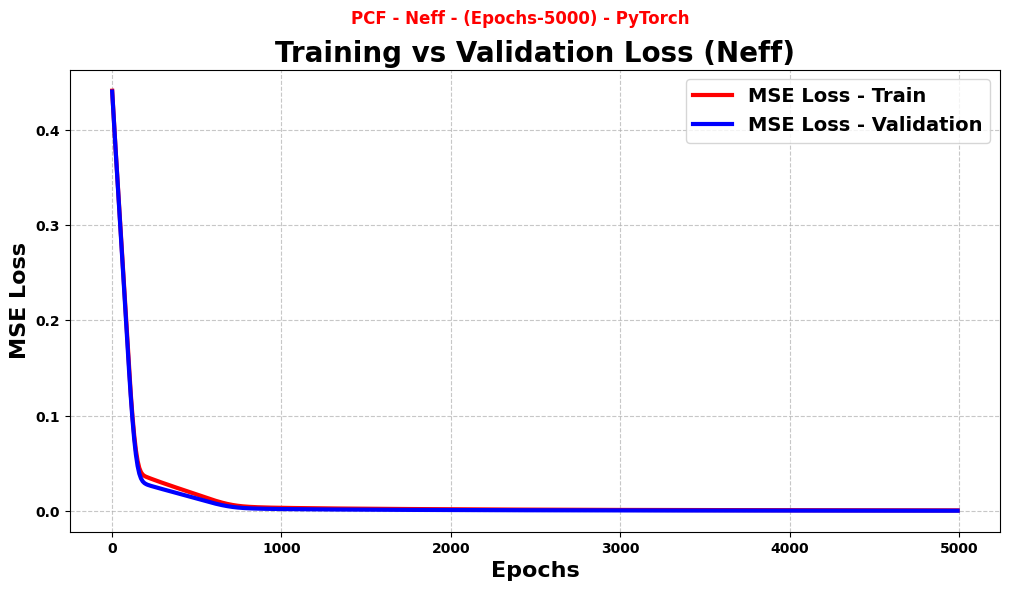

In [ ]:
#################   plotting graphs together - neff  ################
###############################################################

# Increase figure size for better visibility
plt.figure(figsize=(12, 6))

# Title of the entire figure
plt.suptitle('PCF - Neff - (Epochs-{}) - PyTorch'.format(epochs),
             fontsize=12, color='r', fontweight='bold')

# Subplot for Training and Validation Loss
plt.subplot(1, 1, 1)  # Single subplot (1 row, 1 column)
plt.plot(running_loss_index, running_loss, 'r-', linewidth=3, label='MSE Loss - Train')
plt.plot(running_loss_validation_index, running_loss_validation, 'b-', linewidth=3, label='MSE Loss - Validation')

# Labels and Title
plt.xlabel('Epochs', fontsize=16, fontweight='bold')
plt.ylabel('MSE Loss', fontsize=16, fontweight='bold')
plt.title('Training vs Validation Loss (Neff)', fontsize=20, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()

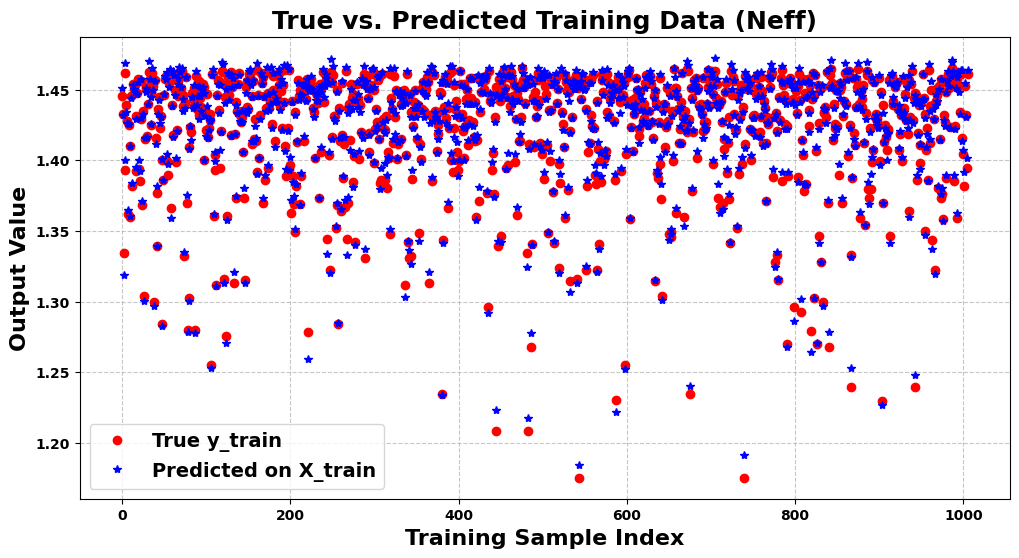

In [ ]:
plt.figure(figsize=(12, 6))  # Increase figure size for better visibility

# Subplot for True vs. Predicted Training Data
plt.subplot(1, 1, 1)  # Single subplot (1 row, 1 column)
plt.plot(scaler2.inverse_transform(y_train)[:, 0], 'ro', markersize=6, label='True y_train')  # Reduced marker size for clarity
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:, 0], 'b*', markersize=6, label='Predicted on X_train')

# Titles and Labels
plt.xlabel('Training Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Training Data (Neff)', fontsize=18, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()

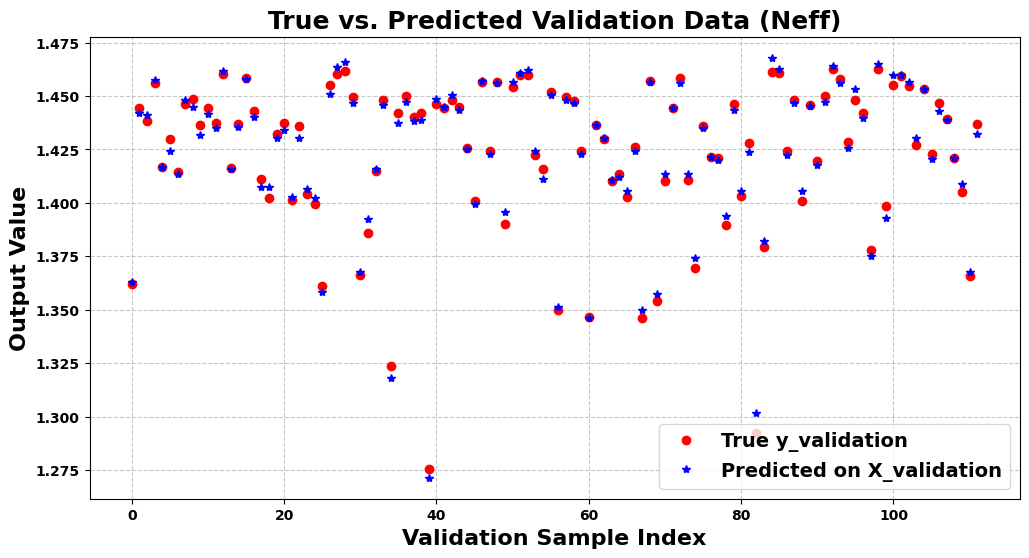

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Increase figure size for better visibility

# Subplot for True vs. Predicted Validation Data
plt.subplot(1, 1, 1)  # Single subplot (1 row, 1 column)
plt.plot(scaler2.inverse_transform(y_validation)[:, 0], 'ro', markersize=6, label='True y_validation')  # Reduced marker size for clarity
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:, 0], 'b*', markersize=6, label='Predicted on X_validation')

# Titles and Labels
plt.xlabel('Validation Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Validation Data (Neff)', fontsize=18, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()


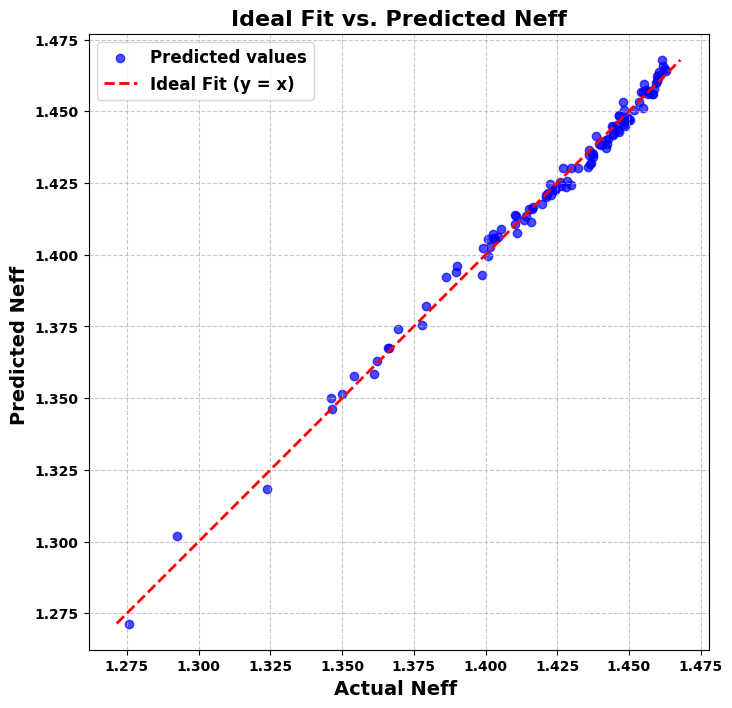

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Inverse transform the data
true_vals = scaler2.inverse_transform(y_validation)[:, 0]
pred_vals = scaler2.inverse_transform(predicted_on_X_validation)[:, 0]

plt.figure(figsize=(8, 8))

# Scatter plot of predicted vs. true values
plt.scatter(true_vals, pred_vals, color='blue', label='Predicted values', alpha=0.7)

# Ideal fit line (y = x)
min_val = min(min(true_vals), min(pred_vals))
max_val = max(max(true_vals), max(pred_vals))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Fit (y = x)', linewidth=2)

# Labels and Title
plt.xlabel('Actual Neff ', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Neff ', fontsize=14, fontweight='bold')
plt.title('Ideal Fit vs. Predicted Neff', fontsize=16, fontweight='bold')

# Grid and Legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.axis('equal')  # Ensure 1:1 aspect ratio for meaningful y = x line

# Show the plot
plt.show()


In [ ]:
# Assuming actual_neff and predicted_neff are numpy arrays from your test and prediction
neff_comparison_df = pd.DataFrame({
    'Actual neff': true_vals,
    'Predicted neff':pred_vals
})

print(neff_comparison_df.head())

   Actual neff  Predicted neff
0      1.36215        1.362997
1      1.44445        1.441939
2      1.43849        1.441330
3      1.45602        1.457432
4      1.41666        1.416635


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Compute evaluation metrics for neff
mse_neff = mean_squared_error(true_vals, pred_vals)
mape_neff = mean_absolute_percentage_error(true_vals,pred_vals)
r2_neff = r2_score(true_vals, pred_vals)

print(f"Mean Squared Error (MSE) for neff: {mse_neff:.6f}")
print(f"Mean Absolute Percentage Error (MAPE) for neff: {mape_neff * 100:.2f}%")
print(f"R² Score for neff: {r2_neff:.4f}")

Mean Squared Error (MSE) for neff: 0.000009
Mean Absolute Percentage Error (MAPE) for neff: 0.18%
R² Score for neff: 0.9929


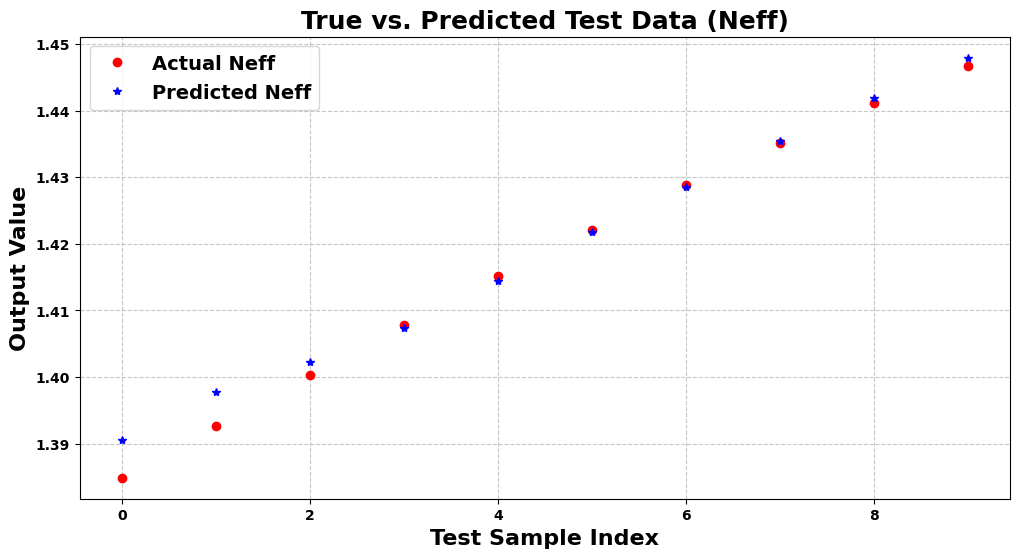

In [ ]:
# Create a larger figure for better readability
plt.figure(figsize=(12, 6))

# Subplot for True vs. Predicted Test Data
plt.subplot(1, 1, 1)  # Single subplot
plt.plot(scaler2.inverse_transform(y_test)[:, 0], 'ro', markersize=6, label='Actual Neff')  # Smaller markers for clarity
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:, 0], 'b*', markersize=6, label='Predicted Neff')

# Titles and Labels
plt.xlabel('Test Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Test Data (Neff)', fontsize=18, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()

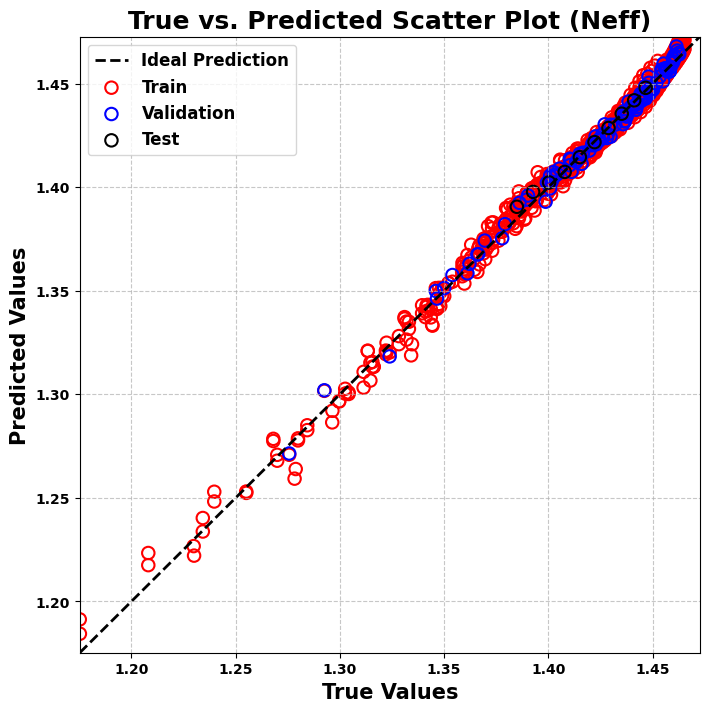

In [ ]:
# Create a larger figure for better clarity
plt.figure(figsize=(8, 8))

# Extract true and predicted values for train, validation, and test sets
xx = scaler2.inverse_transform(y_train)[:, 0]
yy = scaler2.inverse_transform(predicted_on_X_train)[:, 0]
xx_validation = scaler2.inverse_transform(y_validation)[:, 0]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:, 0]
xx_test = scaler2.inverse_transform(y_test)[:, 0]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:, 0]

# Define line range for reference
bubble_plot_line_x1y1 = [min(np.minimum(xx, yy)), max(np.maximum(xx, yy))]
bubble_plot_line_x2y2 = bubble_plot_line_x1y1  # Diagonal reference line

# Set axis limits based on data range
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])

# Reference diagonal line (ideal prediction)
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k--', linewidth=2, label="Ideal Prediction")

# Scatter plots with better visibility
plt.scatter(xx, yy, label='Train', marker='o', facecolors='none', edgecolors='red', s=80, linewidths=1.5)
plt.scatter(xx_validation, yy_validation, label='Validation', marker='o', facecolors='none', edgecolors='blue', s=80, linewidths=1.5)
plt.scatter(xx_test, yy_test, label='Test', marker='o', facecolors='none', edgecolors='black', s=80, linewidths=1.5)

# Labels, Title, and Grid
plt.xlabel('True Values', fontsize=15, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=15, fontweight='bold')
plt.title('True vs. Predicted Scatter Plot (Neff)', fontsize=18, fontweight='bold')
plt.grid(linestyle='--', linewidth=0.8, alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=12)

# Show plot
plt.show()


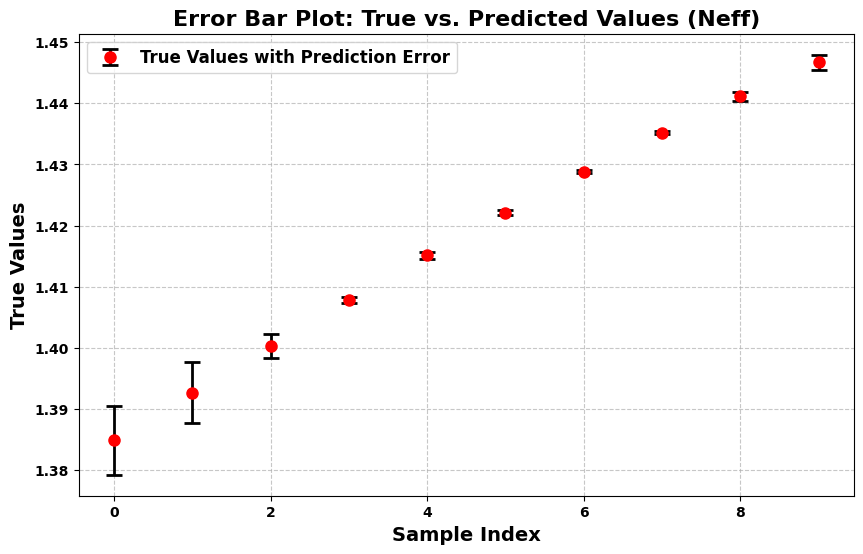

In [ ]:
# Create a larger figure for better readability
plt.figure(figsize=(10, 6))

# Extract true and predicted values for test set
true_values = scaler2.inverse_transform(y_test)[:, 0]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:, 0]

# X-axis index
x_index = np.arange(len(true_values))

# Calculate absolute error for y-error bars
error_values = np.abs(predicted_values - true_values)

# Plot error bars with better visibility
plt.errorbar(
    x=x_index,
    y=true_values,
    yerr=error_values,
    fmt='o',
    color='red',         # Change point color to red for clarity
    ecolor='black',      # Black error bars
    elinewidth=2,
    capsize=6,           # Increase capsize for better visibility
    capthick=2,          # Make cap thicker for visibility
    markersize=8,        # Increase marker size
    label='True Values with Prediction Error'
)

# Titles and Labels
plt.xlabel('Sample Index', fontsize=14, fontweight='bold')
plt.ylabel('True Values', fontsize=14, fontweight='bold')
plt.title('Error Bar Plot: True vs. Predicted Values (Neff)', fontsize=16, fontweight='bold')

# Grid for better readability
plt.grid(linestyle='--', linewidth=0.8, alpha=0.7)

# Add legend
plt.legend(loc='best', fontsize=12)

# Show plot
plt.show()


In [ ]:
print("o/p of test set:           \n", (scaler2.inverse_transform(y_test)[:,0]))
print("predicted o/p of test set: \n", (scaler2.inverse_transform(predicted_on_X_test)[:,0]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))

o/p of test set:           
 [1.38489  1.39268  1.40035  1.40784  1.41511  1.42213  1.428834 1.43519
 1.44116  1.4467  ]
predicted o/p of test set: 
 [1.3905324 1.3977203 1.4022794 1.4073628 1.4144899 1.421737  1.4285729
 1.4354719 1.4419191 1.4479545]
mse_test_set:  0.0002219804426177995


In [ ]:
# Inverse transform the scaled data
y_test_actual_neff = scaler2.inverse_transform(y_test)[:, 0]
y_test_predicted_neff = scaler2.inverse_transform(predicted_on_X_test)[:, 0]

# Store both in a single DataFrame
df_neff = pd.DataFrame({
    "Actual Output": y_test_actual_neff,
    "Predicted Output": y_test_predicted_neff
})

print(df_neff)

   Actual Output  Predicted Output
0       1.384890          1.390532
1       1.392680          1.397720
2       1.400350          1.402279
3       1.407840          1.407363
4       1.415110          1.414490
5       1.422130          1.421737
6       1.428834          1.428573
7       1.435190          1.435472
8       1.441160          1.441919
9       1.446700          1.447955


In [ ]:
# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

mse = mean_squared_error(y_test_actual_neff, y_test_predicted_neff)
mape = mean_absolute_percentage_error(y_test_actual_neff, y_test_predicted_neff)
r2 = r2_score(y_test_actual_neff, y_test_predicted_neff)

# Print results
print("For Neff:")
print("\nMean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R² Score:", r2)

For Neff:

Mean Squared Error (MSE): 6.40283478212686e-06
Mean Absolute Percentage Error (MAPE): 0.0011897779082558856
R² Score: 0.9837815111668441


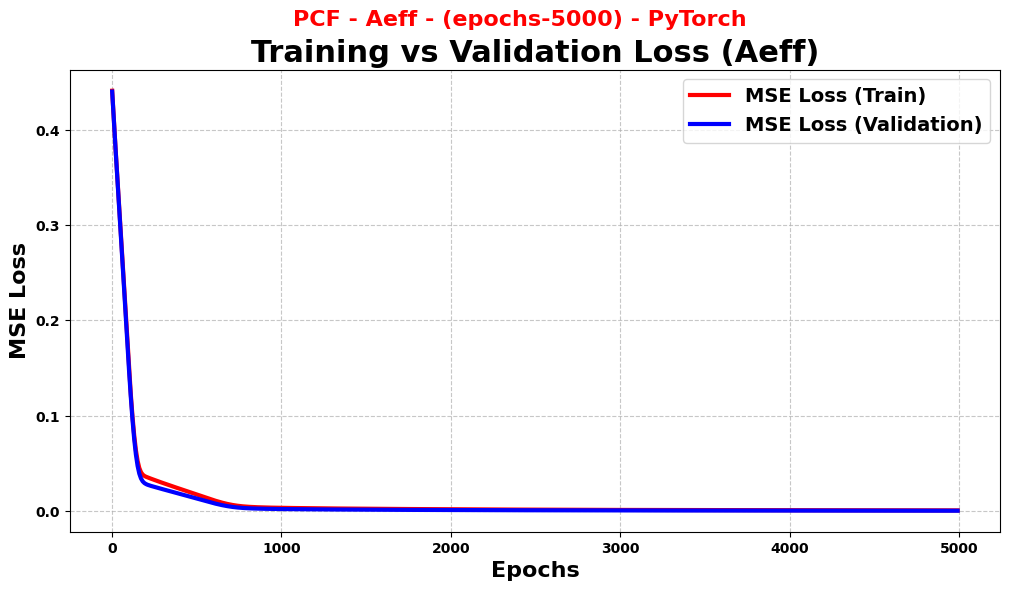

In [ ]:
#################   plotting graphs together - Aeff  ################
###############################################################
# Create a larger figure for better readability
plt.figure(figsize=(12, 6))

# Set title with bold font and increased size
plt.suptitle('PCF - Aeff - (epochs-{}) - PyTorch'.format(epochs),
             fontsize=16, color='red', fontweight='bold')

# First subplot: Training vs. Validation MSE Loss
# plt.subplot(231)
# plt.subplot(2, 3, 1)  # Single subplot (1 row, 1 column)
# Plot training loss
plt.plot(running_loss_index, running_loss, 'r-', linewidth=3, label='MSE Loss (Train)')
# Plot validation loss
plt.plot(running_loss_validation_index, running_loss_validation, 'b-', linewidth=3, label='MSE Loss (Validation)')

# Labels and legends
plt.xlabel('Epochs', fontsize=16, fontweight='bold')
plt.ylabel('MSE Loss', fontsize=16, fontweight='bold')
plt.title('Training vs Validation Loss (Aeff)', fontsize=22, fontweight='bold')
plt.legend(loc='best', fontsize=14)

# Add a grid for better readability
# plt.grid(linestyle='--', linewidth=0.8, alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.7)
# Show the plot
plt.show()


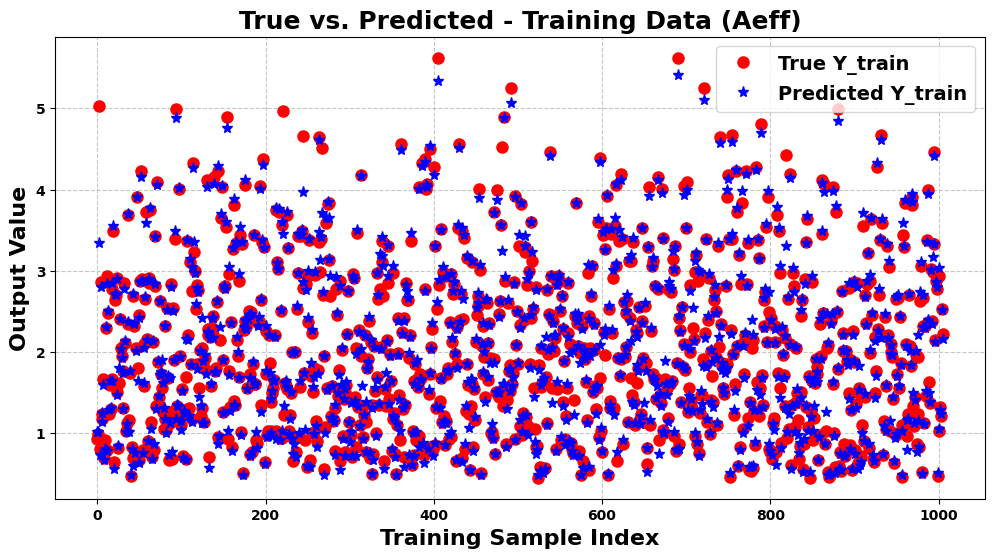

In [ ]:
plt.figure(figsize=(12, 6))

# Second subplot for Training Predictions
# plt.subplot(232)
# Subplot for True vs. Predicted Training Data
plt.subplot(1, 1, 1)  # Single subplot (1 row, 1 column)
# Plot true training data
plt.plot(scaler2.inverse_transform(y_train)[:, 1], 'ro', markersize=8, label='True Y_train')
# Plot predicted training data
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:, 1], 'b*', markersize=8, label='Predicted Y_train')

# Labels and Legends
plt.xlabel('Training Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted - Training Data (Aeff)', fontsize=18, fontweight='bold')
plt.legend(loc='best', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


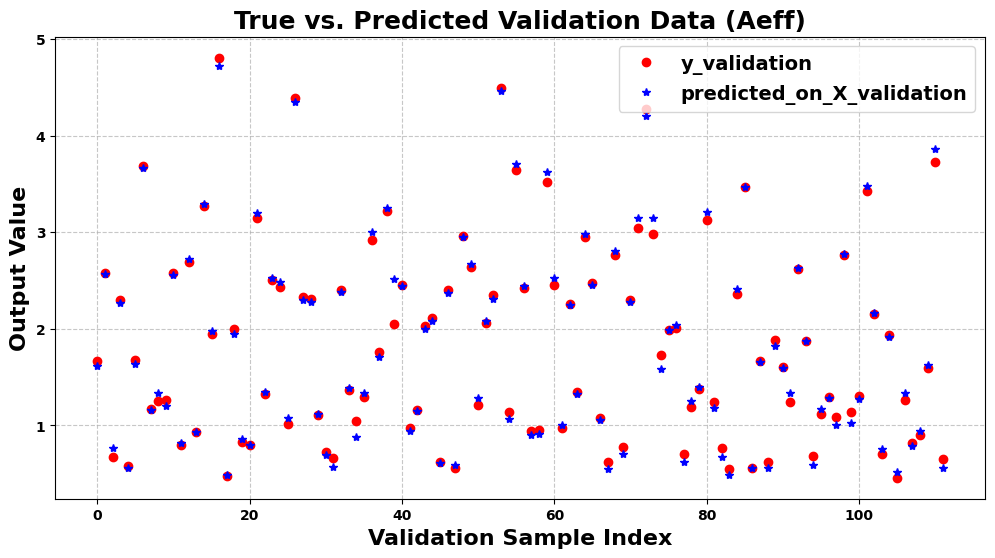

In [ ]:
# Create a larger figure for better readability
plt.figure(figsize=(12, 6))

# Second subplot for Training Predictions
# plt.subplot(232)

# Subplot for True vs. Predicted Validation Data
plt.subplot(1, 1, 1)  # Single subplot (1 row, 1 column)
# Plot true data
plt.plot(scaler2.inverse_transform(y_validation)[:,1], 'ro', markersize=6, label='y_validation')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:,1], 'b*', markersize=6, label='predicted_on_X_validation')

# Labels and Legends
plt.xlabel('Validation Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Validation Data (Aeff)', fontsize=18, fontweight='bold')
plt.legend(loc='best', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


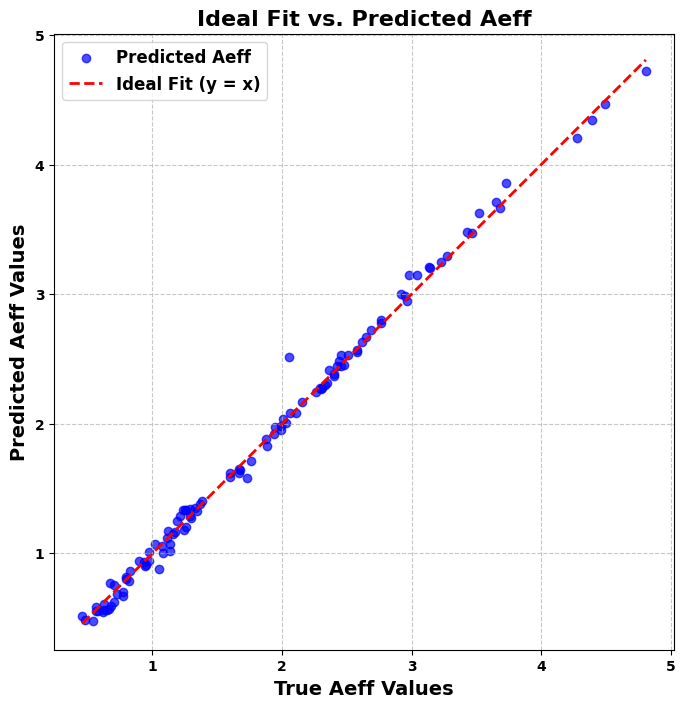

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Inverse transform the true and predicted Aeff values (column index 1)
true_aeff = scaler2.inverse_transform(y_validation)[:, 1]
pred_aeff = scaler2.inverse_transform(predicted_on_X_validation)[:, 1]

# Create a square figure
plt.figure(figsize=(8, 8))

# Scatter plot of predicted vs true
plt.scatter(true_aeff, pred_aeff, color='blue', alpha=0.7, label='Predicted Aeff')

# Plot the ideal fit line (y = x)
min_val = min(min(true_aeff), min(pred_aeff))
max_val = max(max(true_aeff), max(pred_aeff))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Ideal Fit (y = x)')

# Titles and labels
plt.xlabel('True Aeff Values', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Aeff Values', fontsize=14, fontweight='bold')
plt.title('Ideal Fit vs. Predicted Aeff', fontsize=16, fontweight='bold')

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.axis('equal')  # Ensures the scale of both axes is the same

# Show the plot
plt.show()


In [ ]:
# Assuming actual_neff and predicted_neff are numpy arrays from your test and prediction
aeff_comparison_df = pd.DataFrame({
    'Actual aeff': true_aeff,
    'Predicted aeff': pred_aeff
})

print(aeff_comparison_df.head())

   Actual aeff  Predicted aeff
0     1.671780        1.619662
1     2.578530        2.566469
2     0.670275        0.769764
3     2.303330        2.270282
4     0.582388        0.557302


In [ ]:
# Compute evaluation metrics for neff
mse_aeff = mean_squared_error(true_aeff, pred_aeff)
mape_aeff = mean_absolute_percentage_error(true_aeff, pred_aeff)
r2_aeff = r2_score(true_aeff, pred_aeff)

print(f"Mean Squared Error (MSE) for aeff: {mse_aeff:.6f}")
print(f"Mean Absolute Percentage Error (MAPE) for aeff: {mape_aeff * 100:.2f}%")
print(f"R² Score for aeff: {r2_aeff:.4f}")

Mean Squared Error (MSE) for aeff: 0.005119
Mean Absolute Percentage Error (MAPE) for aeff: 3.69%
R² Score for aeff: 0.9950


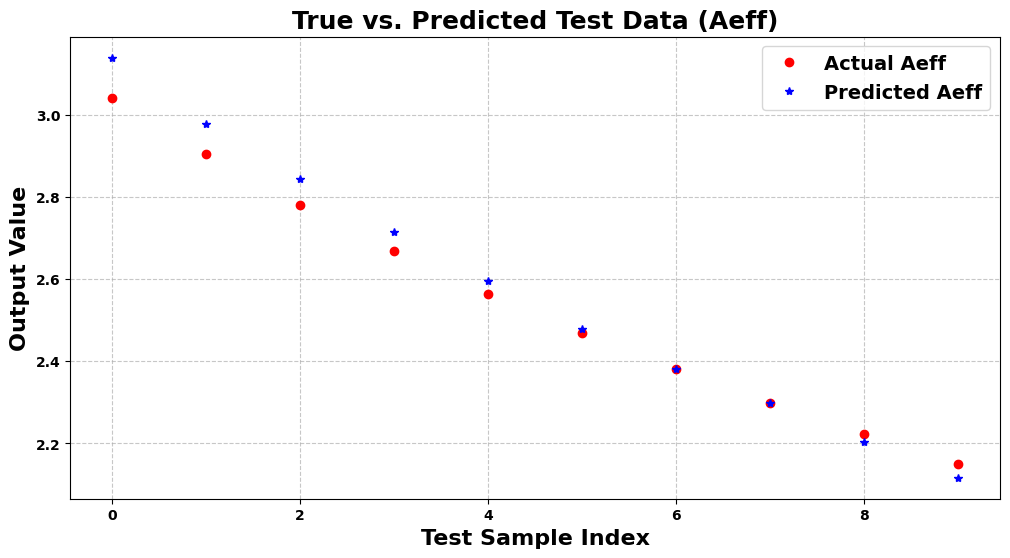

In [ ]:
# Create a larger figure for better readability
plt.figure(figsize=(12, 6))

# Subplot for True vs. Predicted Test Data
plt.subplot(1, 1, 1)  # Single subplot
# Plot true data
plt.plot(scaler2.inverse_transform(y_test)[:,1], 'ro', markersize=6, label='Actual Aeff')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:,1], 'b*', markersize=6, label='Predicted Aeff')

# Titles and Labels
plt.xlabel('Test Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Test Data (Aeff)', fontsize=18, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()

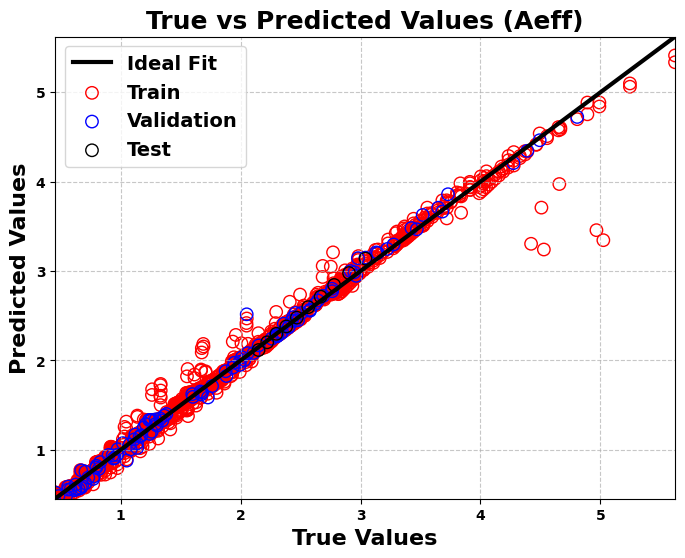

In [ ]:
# Create a larger figure for better readability
plt.figure(figsize=(8, 6))

# Extract true and predicted values
xx = scaler2.inverse_transform(y_train)[:, 1]
yy = scaler2.inverse_transform(predicted_on_X_train)[:, 1]
xx_validation = scaler2.inverse_transform(y_validation)[:, 1]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:, 1]
xx_test = scaler2.inverse_transform(y_test)[:, 1]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:, 1]

# Define the diagonal reference line
bubble_plot_line_x1y1 = [min(np.minimum(xx, yy)), max(np.maximum(xx, yy))]
bubble_plot_line_x2y2 = [min(np.minimum(xx, yy)), max(np.maximum(xx, yy))]

# Set limits for better scaling
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])

# Plot diagonal reference line
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=3, label="Ideal Fit")

# Scatter plots with improved visibility
plt.scatter(xx, yy, label='Train', marker='o', facecolors='none', edgecolors='red', s=80)
plt.scatter(xx_validation, yy_validation, label='Validation', marker='o', facecolors='none', edgecolors='blue', s=80)
plt.scatter(xx_test, yy_test, label='Test', marker='o', facecolors='none', edgecolors='black', s=80)

# Labels and Legends
plt.xlabel('True Values', fontsize=16, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=16, fontweight='bold')
plt.title('True vs Predicted Values (Aeff)', fontsize=18, fontweight='bold')
plt.legend(loc='best', fontsize=14)

# Grid for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


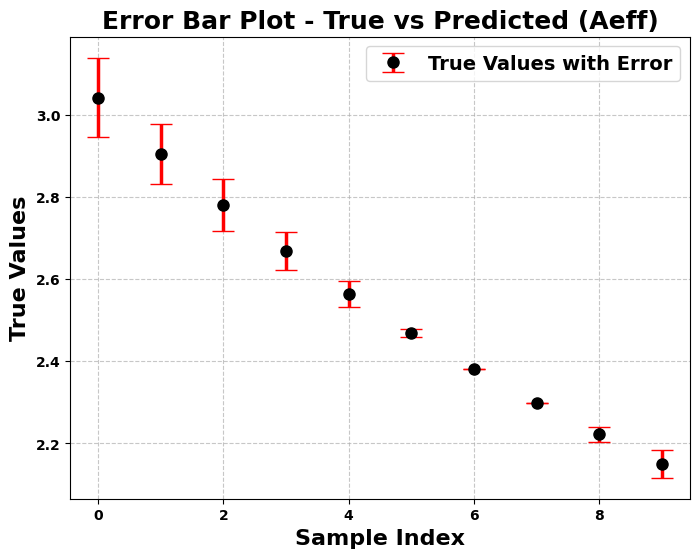

In [ ]:
# Create a larger figure for better visibility
plt.figure(figsize=(8, 6))

# Extract true and predicted values
true_values = scaler2.inverse_transform(y_test)[:, 1]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:, 1]
x_index = np.arange(len(true_values))

# Calculate absolute error for error bars
error_values = np.abs(predicted_values - true_values)

# Plot error bars with improved visibility
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o',
             color='black', ecolor='red', elinewidth=2.5, capsize=8, markersize=8, label="True Values with Error")

# Labels and Title
plt.xlabel('Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('True Values', fontsize=16, fontweight='bold')
plt.title('Error Bar Plot - True vs Predicted (Aeff)', fontsize=18, fontweight='bold')

# Grid for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

# Show the legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()


In [ ]:
print("o/p of test set:           \n", (scaler2.inverse_transform(y_test)[:,1]))
print("predicted o/p of test set: \n", (scaler2.inverse_transform(predicted_on_X_test)[:,1]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))

o/p of test set:           
 [3.04184 2.90433 2.78024 2.66742 2.56412 2.46894 2.38074 2.29861 2.22181
 2.14976]
predicted o/p of test set: 
 [3.1388073 2.9781537 2.8445141 2.713684  2.5962448 2.479423  2.3802724
 2.2980006 2.2030747 2.1165679]
mse_test_set:  0.0002219804426177995


In [ ]:
# Inverse transform the scaled data
y_test_actual_aeff = scaler2.inverse_transform(y_test)[:, 1]
y_test_predicted_aeff = scaler2.inverse_transform(predicted_on_X_test)[:, 1]

# Store both in a single DataFrame
df_aeff = pd.DataFrame({
    "Actual Output": y_test_actual_aeff,
    "Predicted Output": y_test_predicted_aeff
})

print(df_aeff)

   Actual Output  Predicted Output
0        3.04184          3.138807
1        2.90433          2.978154
2        2.78024          2.844514
3        2.66742          2.713684
4        2.56412          2.596245
5        2.46894          2.479423
6        2.38074          2.380272
7        2.29861          2.298001
8        2.22181          2.203075
9        2.14976          2.116568


In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test_actual_aeff, y_test_predicted_aeff)
mape = mean_absolute_percentage_error(y_test_actual_aeff, y_test_predicted_aeff)
r2 = r2_score(y_test_actual_aeff, y_test_predicted_aeff)

# Print results
print("For Aeff:")
print("\nMean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R² Score:", r2)

For Aeff:

Mean Squared Error (MSE): 0.002371934379990225
Mean Absolute Percentage Error (MAPE): 0.013886715588491503
R² Score: 0.9703775441593969


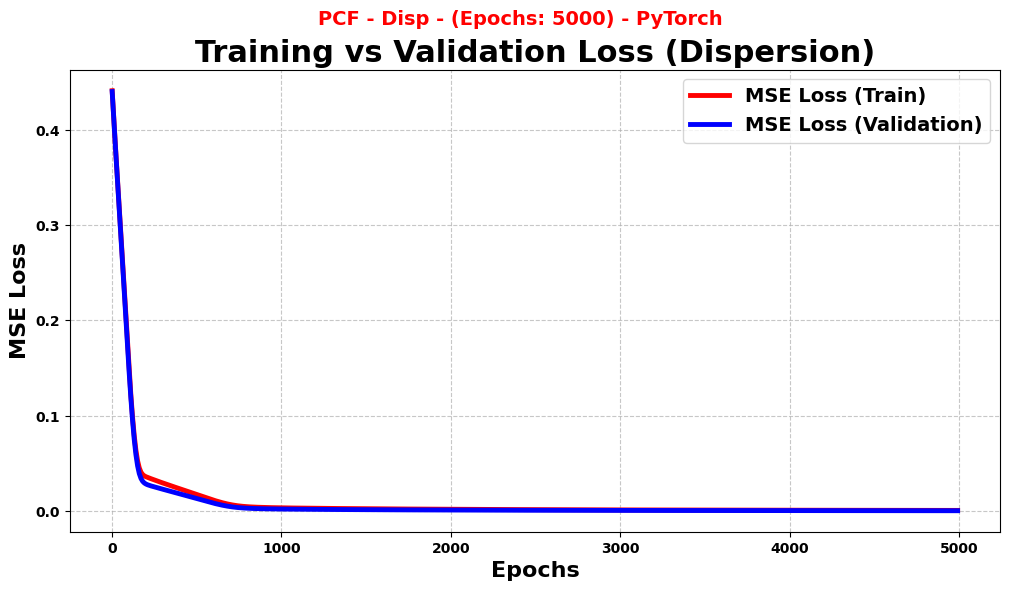

In [ ]:
#################   plotting graphs together - disp  ################
###############################################################

# Create a larger figure for better visibility
plt.figure(figsize=(12, 6))

# Set title with bold font and increased size
plt.suptitle('PCF - Disp - (Epochs: {}) - PyTorch'.format(epochs),
             fontsize=14, color='red', fontweight='bold')

# First subplot: Training vs. Validation MSE Loss
# plt.subplot(231)
plt.subplot(1, 1, 1)  # Single subplot (1 row, 1 column)
# Plot training loss
plt.plot(running_loss_index, running_loss, 'r-', linewidth=3.5, label='MSE Loss (Train)')
# Plot validation loss
plt.plot(running_loss_validation_index, running_loss_validation, 'b-', linewidth=3.5, label='MSE Loss (Validation)')

# Labels and legends
plt.xlabel('Epochs', fontsize=16, fontweight='bold')
plt.ylabel('MSE Loss', fontsize=16, fontweight='bold')
plt.title('Training vs Validation Loss (Dispersion)', fontsize=22, fontweight='bold')
plt.legend(loc='best', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

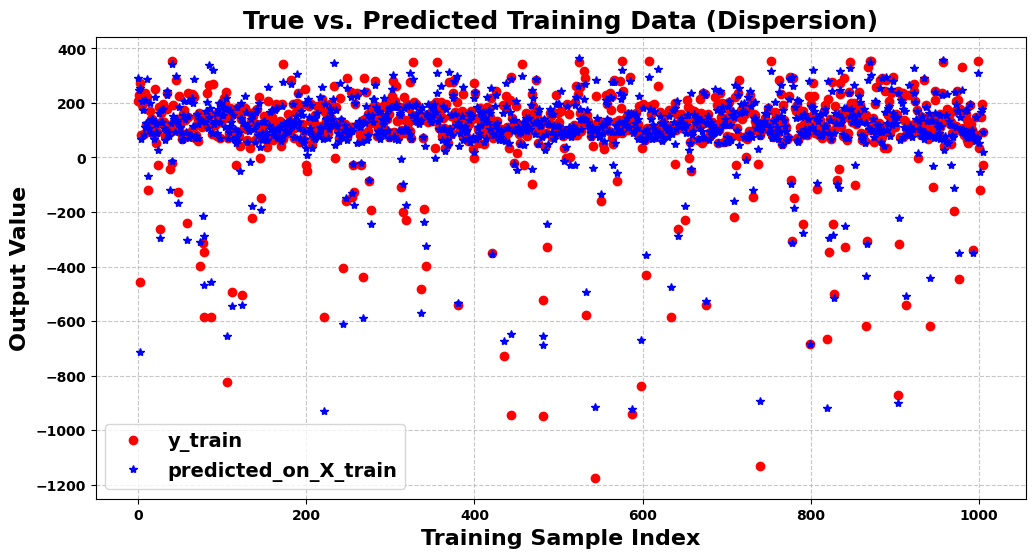

In [ ]:
plt.figure(figsize=(12, 6))  # Increase figure size for better visibility

# Subplot for True vs. Predicted Training Data
plt.subplot(1, 1, 1)  # Single subplot (1 row, 1 column)
# Plot true data
plt.plot(scaler2.inverse_transform(y_train)[:,2], 'ro', markersize=6, label='y_train')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:,2], 'b*', markersize=6, label='predicted_on_X_train')

# Titles and Labels
plt.xlabel('Training Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Training Data (Dispersion)', fontsize=18, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()

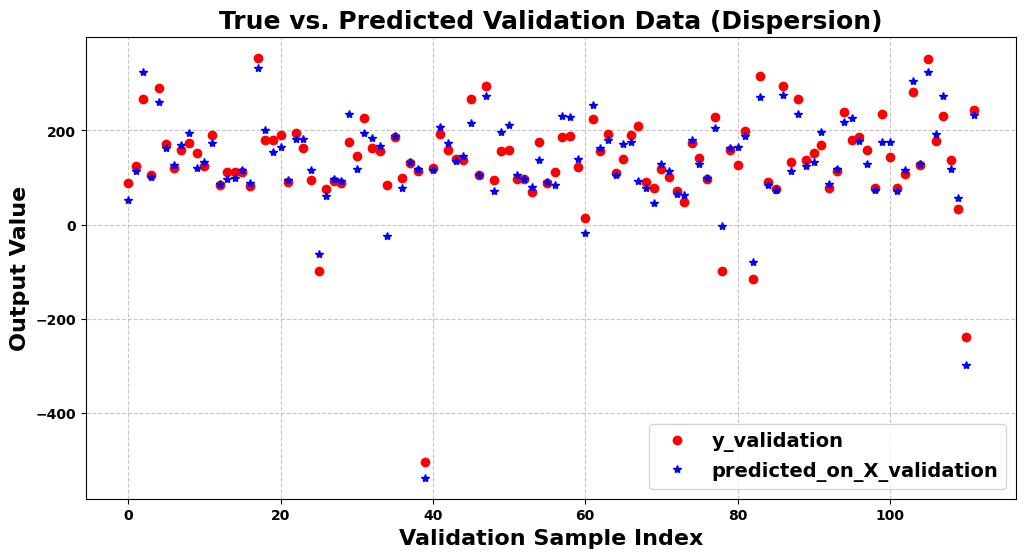

In [ ]:
plt.figure(figsize=(12, 6))  # Increase figure size for better visibility

# Subplot for True vs. Predicted Validation Data
plt.subplot(1, 1, 1)  # Single subplot (1 row, 1 column)
# Plot true data
plt.plot(scaler2.inverse_transform(y_validation)[:,2], 'ro', markersize=6, label='y_validation')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:,2], 'b*', markersize=6, label='predicted_on_X_validation')
# Titles and Labels
plt.xlabel('Validation Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Validation Data (Dispersion)', fontsize=18, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()

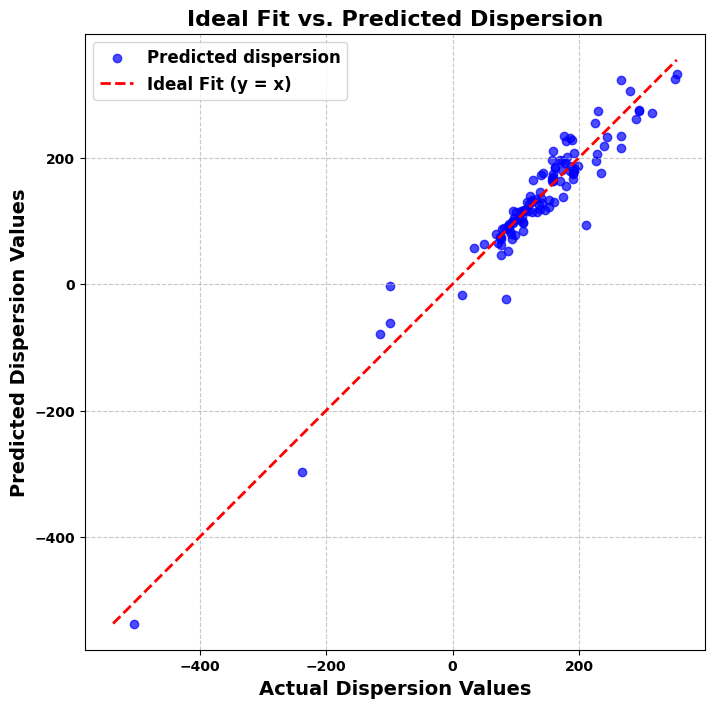

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Inverse transform for dispersion (assuming it's at index 2)
actual_dispersion = scaler2.inverse_transform(y_validation)[:, 2]
predicted_dispersion = scaler2.inverse_transform(predicted_on_X_validation)[:, 2]

# Create the figure
plt.figure(figsize=(8, 8))

# Scatter plot of predicted vs. actual
plt.scatter(actual_dispersion, predicted_dispersion, color='blue', alpha=0.7, label='Predicted dispersion')

# Ideal fit line (y = x)
min_val = min(min(actual_dispersion), min(predicted_dispersion))
max_val = max(max(actual_dispersion), max(predicted_dispersion))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Ideal Fit (y = x)')

# Axis labels and title
plt.xlabel('Actual Dispersion Values', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Dispersion Values', fontsize=14, fontweight='bold')
plt.title('Ideal Fit vs. Predicted Dispersion', fontsize=16, fontweight='bold')

# Grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.axis('equal')  # Ensures 1:1 aspect ratio

# Show the plot
plt.show()


In [ ]:
disp_comparison_df = pd.DataFrame({
    'Actual disp': actual_dispersion,
    'Predicted disp': predicted_dispersion
})

print(disp_comparison_df.head())

   Actual disp  Predicted disp
0      87.6416       51.645626
1     124.9960      113.910507
2     266.2740      323.080322
3     106.3720      100.576332
4     290.4560      261.194427


In [ ]:
# Compute evaluation metrics for disp
mse_disp = mean_squared_error(actual_dispersion, predicted_dispersion)
mape_disp = mean_absolute_percentage_error(actual_dispersion, predicted_dispersion)
r2_disp = r2_score(actual_dispersion, predicted_dispersion)

print(f"Mean Squared Error (MSE) for disp: {mse_disp:.6f}")
print(f"Mean Absolute Percentage Error (MAPE) for disp: {mape_disp * 100:.2f}%")
print(f"R² Score for disp: {r2_disp:.4f}")

Mean Squared Error (MSE) for disp: 886.926229
Mean Absolute Percentage Error (MAPE) for disp: 16.91%
R² Score for disp: 0.9189


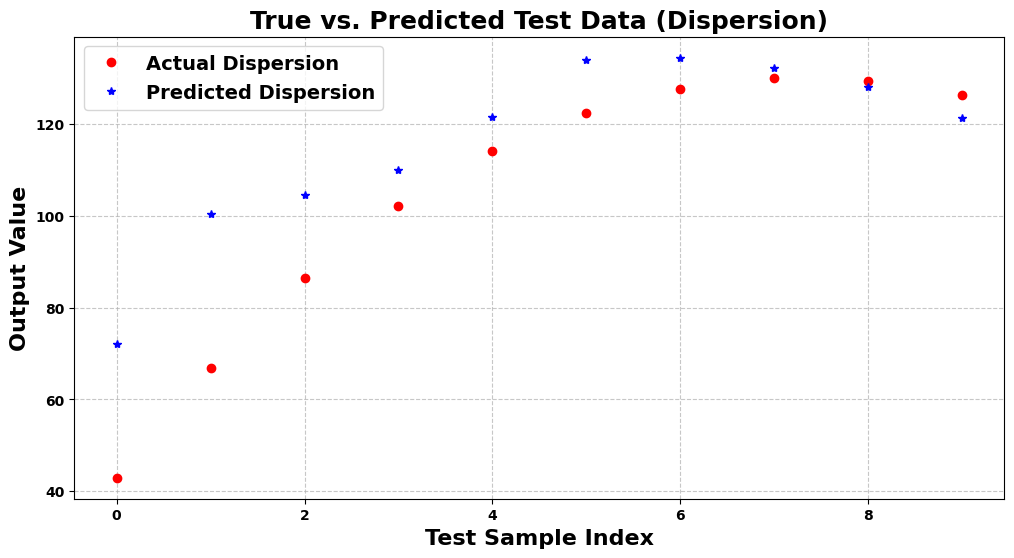

In [ ]:
# Create a larger figure for better readability
plt.figure(figsize=(12, 6))

# Subplot for True vs. Predicted Test Data
plt.subplot(1, 1, 1)  # Single subplot
# Plot true data
plt.plot(scaler2.inverse_transform(y_test)[:,2], 'ro', markersize=6, label='Actual Dispersion')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:,2], 'b*', markersize=6, label='Predicted Dispersion')

# Titles and Labels
plt.xlabel('Test Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Test Data (Dispersion)', fontsize=18, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()

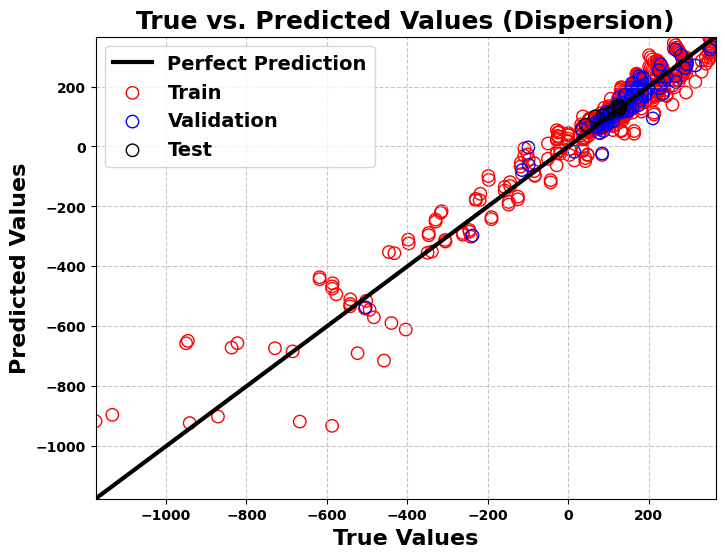

In [ ]:
# Create a larger figure
plt.figure(figsize=(8, 6))

# Extract true and predicted values
xx = scaler2.inverse_transform(y_train)[:,2]
yy = scaler2.inverse_transform(predicted_on_X_train)[:,2]
xx_validation = scaler2.inverse_transform(y_validation)[:,2]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:,2]
xx_test = scaler2.inverse_transform(y_test)[:,2]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:,2]

# Calculate min/max for diagonal reference line
min_val = min(np.min(xx), np.min(yy), np.min(xx_validation), np.min(yy_validation), np.min(xx_test), np.min(yy_test))
max_val = max(np.max(xx), np.max(yy), np.max(xx_validation), np.max(yy_validation), np.max(xx_test), np.max(yy_test))

# Set axis limits
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Plot diagonal reference line
plt.plot([min_val, max_val], [min_val, max_val], 'k-', linewidth=3, label="Perfect Prediction")

# Scatter plots with increased size for visibility
plt.scatter(xx, yy, label='Train', marker='o', facecolors='none', edgecolors='red', s=80)
plt.scatter(xx_validation, yy_validation, label='Validation', marker='o', facecolors='none', edgecolors='blue', s=80)
plt.scatter(xx_test, yy_test, label='Test', marker='o', facecolors='none', edgecolors='black', s=80)

# Labels and legend
plt.xlabel('True Values', fontsize=16, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Values (Dispersion)', fontsize=18, fontweight='bold')
plt.legend(loc='best', fontsize=14)

# Improved grid styling
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()


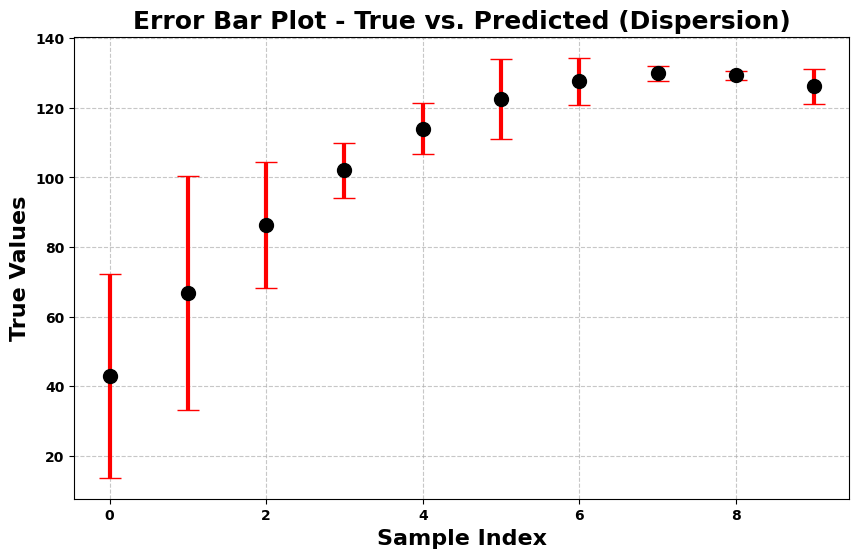

In [ ]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Extract true and predicted values
true_values = scaler2.inverse_transform(y_test)[:,2]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:,2]
x_index = np.arange(len(true_values))  # X-axis indices

# Calculate absolute error for yerr
error_values = np.abs(predicted_values - true_values)

# Plot error bars
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o',
             color='black', ecolor='red', elinewidth=3, capsize=8, markersize=10)

# Labels and title
plt.xlabel('Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('True Values', fontsize=16, fontweight='bold')
plt.title('Error Bar Plot - True vs. Predicted (Dispersion)', fontsize=18, fontweight='bold')

# Grid styling
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [ ]:
print("o/p of test set:           \n", (scaler2.inverse_transform(y_test)[:,2]))
print("predicted o/p of test set: \n", (scaler2.inverse_transform(predicted_on_X_test)[:,2]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))

o/p of test set:           
 [ 42.9646  66.7628  86.4249 102.097  114.007  122.422  127.624  129.864
 129.341  126.183 ]
predicted o/p of test set: 
 [ 72.155    100.380035 104.46572  110.011826 121.42332  133.90001
 134.35861  132.05765  128.075    121.15773 ]
mse_test_set:  0.0002219804426177995


In [ ]:
# Inverse transform the scaled data
y_test_actual_disp = scaler2.inverse_transform(y_test)[:, 2]
y_test_predicted_disp = scaler2.inverse_transform(predicted_on_X_test)[:, 2]

# Store both in a single DataFrame
df_disp = pd.DataFrame({
    "Actual Output": y_test_actual_disp,
    "Predicted Output": y_test_predicted_disp
})

print(df_disp)

   Actual Output  Predicted Output
0        42.9646         72.154999
1        66.7628        100.380035
2        86.4249        104.465721
3       102.0970        110.011826
4       114.0070        121.423317
5       122.4220        133.900009
6       127.6240        134.358612
7       129.8640        132.057648
8       129.3410        128.074997
9       126.1830        121.157730


In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test_actual_disp, y_test_predicted_disp)
mape = mean_absolute_percentage_error(y_test_actual_disp, y_test_predicted_disp)
r2 = r2_score(y_test_actual_disp, y_test_predicted_disp)

# Print results
print("For Dispersion:")
print("\nMean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R² Score:", r2)

For Dispersion:

Mean Squared Error (MSE): 263.40832300704443
Mean Absolute Percentage Error (MAPE): 0.1747290049748971
R² Score: 0.679525499594401


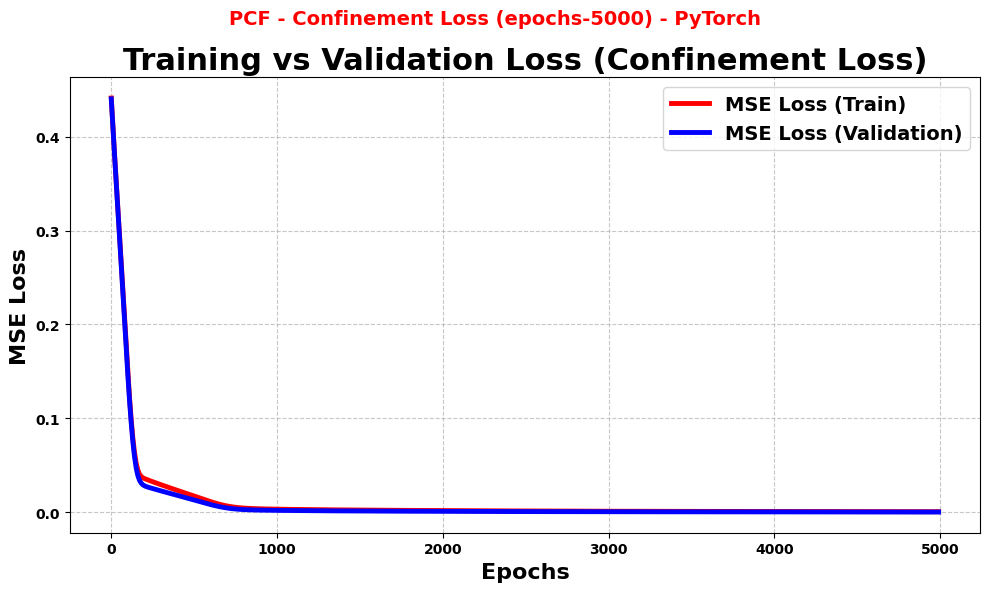

In [ ]:
#################   plotting graphs together - conf-loss  ################
###############################################################
# Create a larger figure
plt.figure(figsize=(10, 6))

# Set title with bold font and increased size
plt.suptitle('PCF - Confinement Loss (epochs-{}) - PyTorch'.format(epochs),
             fontsize=14, color='red', fontweight='bold')

# First subplot: Training vs. Validation MSE Loss
plt.subplot(1, 1, 1)  # Single subplot (1 row, 1 column)

# Plot training loss
plt.plot(running_loss_index, running_loss, 'r-', linewidth=3.5, label='MSE Loss (Train)')
# Plot validation loss
plt.plot(running_loss_validation_index, running_loss_validation, 'b-', linewidth=3.5, label='MSE Loss (Validation)')

# Labels and title
plt.xlabel('Epochs', fontsize=16, fontweight='bold')
plt.ylabel('MSE Loss', fontsize=16, fontweight='bold')
plt.title('Training vs Validation Loss (Confinement Loss)', fontsize=22, fontweight='bold')

# Add legend
plt.legend(loc='best', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


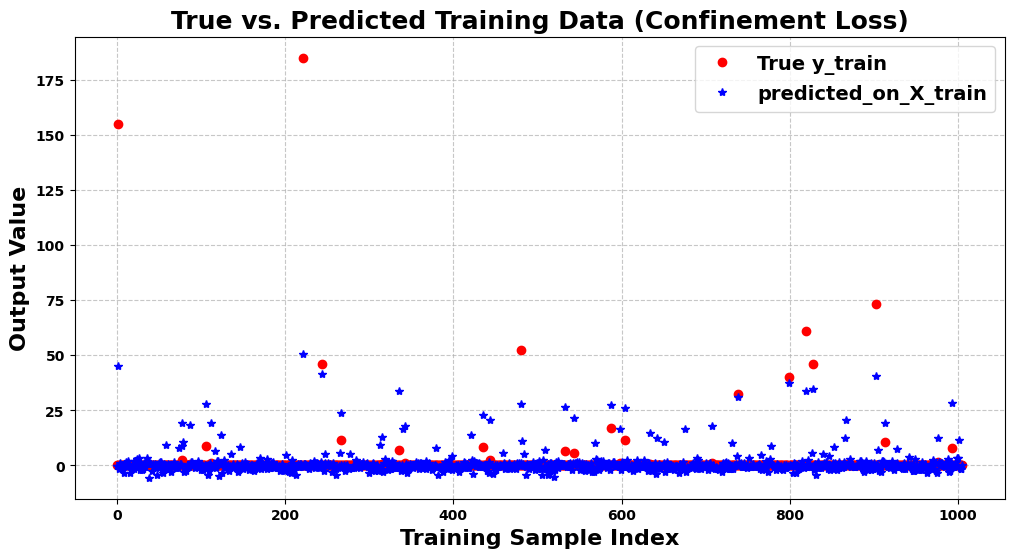

In [ ]:
plt.figure(figsize=(12, 6))  # Increase figure size for better visibility

# Subplot for True vs. Predicted Training Data
plt.subplot(1, 1, 1)  # Single subplot (1 row, 1 column)
# Plot true data
plt.plot(scaler2.inverse_transform(y_train)[:,3], 'ro', markersize=6, label='True y_train')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:,3], 'b*', markersize=6, label='predicted_on_X_train')

# Titles and Labels
plt.xlabel('Training Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Training Data (Confinement Loss)', fontsize=18, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()

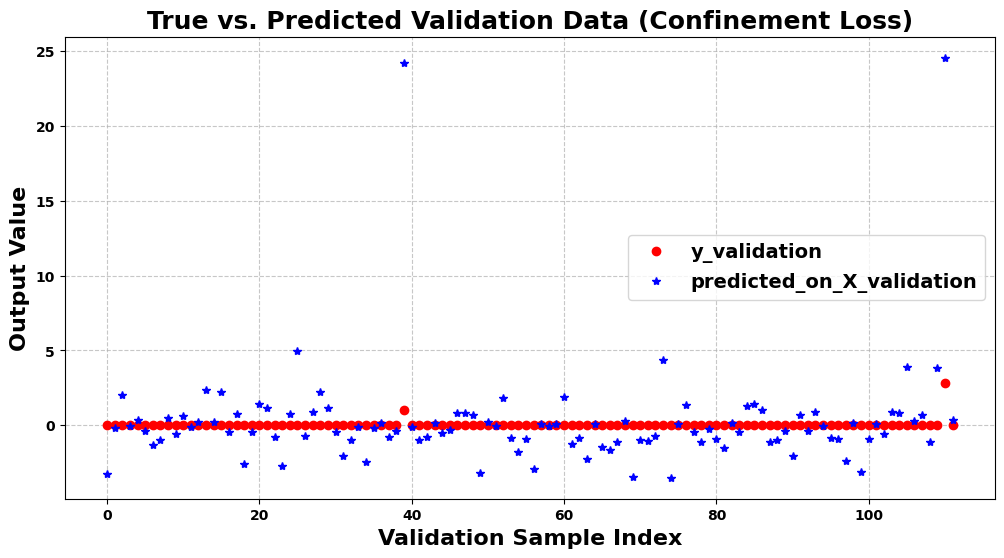

In [ ]:
plt.figure(figsize=(12, 6))  # Increase figure size for better visibility

# Subplot for True vs. Predicted Validation Data
plt.subplot(1, 1, 1)  # Single subplot (1 row, 1 column)
# Plot true data
plt.plot(scaler2.inverse_transform(y_validation)[:,3], 'ro', markersize=6, label='y_validation')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:,3], 'b*', markersize=6, label='predicted_on_X_validation')

# Titles and Labels
plt.xlabel('Validation Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Validation Data (Confinement Loss)', fontsize=18, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()

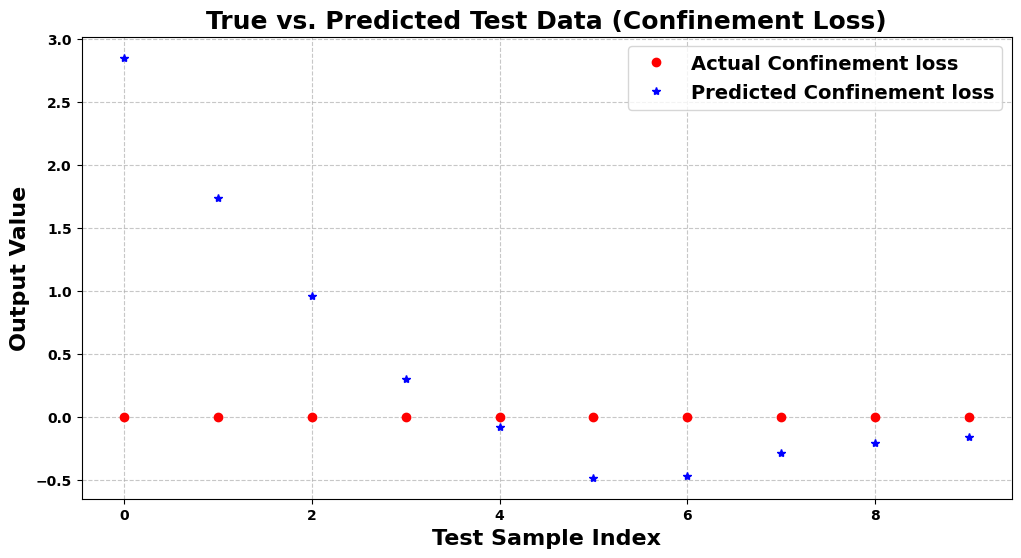

In [ ]:
# Create a larger figure for better readability
plt.figure(figsize=(12, 6))

# Subplot for True vs. Predicted Test Data
plt.subplot(1, 1, 1)  # Single subplot
# Plot true data
plt.plot(scaler2.inverse_transform(y_test)[:,3], 'ro', markersize=6, label='Actual Confinement loss')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:,3], 'b*', markersize=6, label='Predicted Confinement loss')

# Titles and Labels
plt.xlabel('Test Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Test Data (Confinement Loss)', fontsize=18, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()

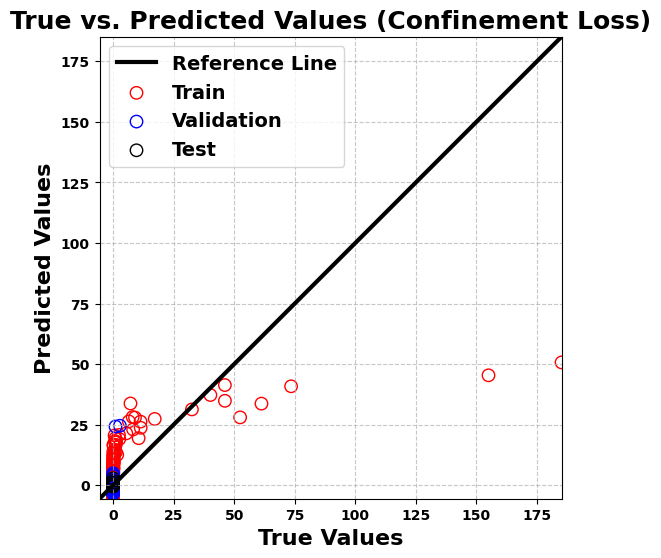

In [ ]:
plt.figure(figsize=(8, 6))

# True vs. Predicted Values (Bubble Plot)
xx = scaler2.inverse_transform(y_train)[:, 3]
yy = scaler2.inverse_transform(predicted_on_X_train)[:, 3]
xx_validation = scaler2.inverse_transform(y_validation)[:, 3]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:, 3]
xx_test = scaler2.inverse_transform(y_test)[:, 3]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:, 3]

# Diagonal reference line
bubble_plot_line_x1y1 = [min(np.minimum(xx, yy)), max(np.maximum(xx, yy))]
bubble_plot_line_x2y2 = bubble_plot_line_x1y1  # Diagonal line

plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=3, label='Reference Line')

# Scatter plots with improved visibility
plt.scatter(xx, yy, label='Train', marker='o', facecolors='none', edgecolors='red', s=80)
plt.scatter(xx_validation, yy_validation, label='Validation', marker='o', facecolors='none', edgecolors='blue', s=80)
plt.scatter(xx_test, yy_test, label='Test', marker='o', facecolors='none', edgecolors='black', s=80)

# Labels, legend, and grid
plt.xlabel('True Values', fontsize=16, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Values (Confinement Loss)', fontsize=18, fontweight='bold')
plt.legend(loc='best', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)

# Maintain aspect ratio
plt.gca().set_aspect('equal')

# Show the plot
plt.show()

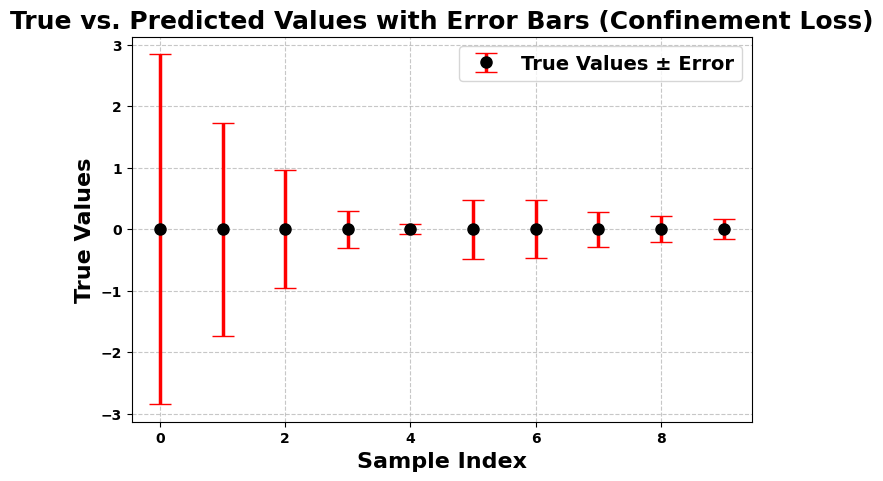

In [ ]:
plt.figure(figsize=(8, 5))

# Extract true and predicted values
true_values = scaler2.inverse_transform(y_test)[:, 3]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:, 3]

# Index for x-axis
x_index = np.arange(len(true_values))

# Absolute error for error bars
error_values = np.abs(predicted_values - true_values)

# Plot error bars with better styling
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black',
             ecolor='red', elinewidth=2.5, capsize=8, markersize=8, label='True Values ± Error')

# Labels, title, and legend
plt.xlabel('Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('True Values', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Values with Error Bars (Confinement Loss)', fontsize=18, fontweight='bold')
plt.legend(loc='best', fontsize=14)

# Grid with improved visibility
plt.grid(linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
print("o/p of test set:           \n", (scaler2.inverse_transform(y_test)[:,3]))
print("predicted o/p of test set: \n", (scaler2.inverse_transform(predicted_on_X_test)[:,3]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))

o/p of test set:           
 [1.54506e-04 3.24724e-05 6.02749e-06 9.78811e-07 1.37772e-07 1.66735e-08
 1.72620e-09 1.52937e-10 1.16957e-11 7.86184e-13]
predicted o/p of test set: 
 [ 2.848528    1.7327385   0.95931745  0.30042887 -0.07970915 -0.48262298
 -0.47135097 -0.2829517  -0.21013409 -0.16110979]
mse_test_set:  0.0002219804426177995


In [ ]:
# Inverse transform the scaled data
y_test_actual_confloss = scaler2.inverse_transform(y_test)[:, 3]
y_test_predicted_confloss = scaler2.inverse_transform(predicted_on_X_test)[:, 3]

# Store both in a single DataFrame
df_confloss = pd.DataFrame({
    "Actual Output": y_test_actual_confloss,
    "Predicted Output": y_test_predicted_confloss
})

print(df_confloss)

   Actual Output  Predicted Output
0   1.545060e-04          2.848528
1   3.247240e-05          1.732738
2   6.027490e-06          0.959317
3   9.788110e-07          0.300429
4   1.377720e-07         -0.079709
5   1.667350e-08         -0.482623
6   1.726200e-09         -0.471351
7   1.529370e-10         -0.282952
8   1.169570e-11         -0.210134
9   7.861840e-13         -0.161110


In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test_actual_confloss, y_test_predicted_confloss)
mape = mean_absolute_percentage_error(y_test_actual_confloss, y_test_predicted_confloss)
r2 = r2_score(y_test_actual_confloss, y_test_predicted_confloss)

# Print results
print("For Confidence loss:")
print("\nMean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R² Score:", r2)

For Confidence loss:

Mean Squared Error (MSE): 1.2737661149470094
Mean Absolute Percentage Error (MAPE): 22504633529.958187
R² Score: -600980638.3944676


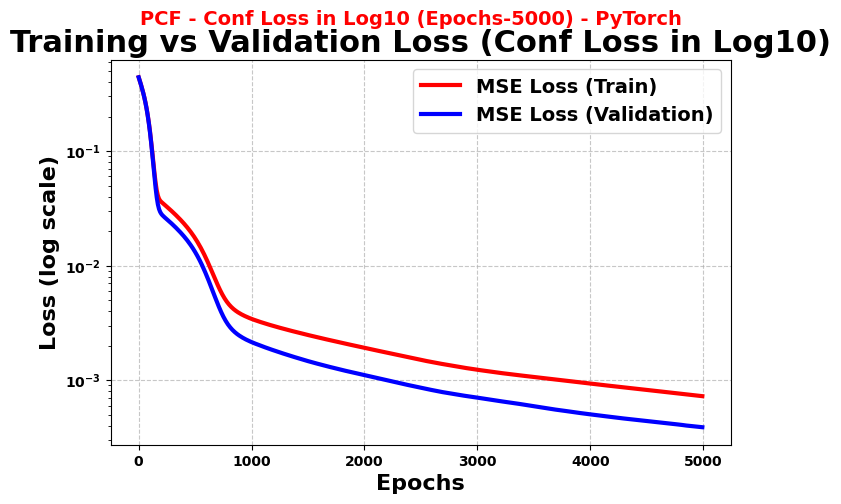

In [ ]:
#################   plotting graphs together - conf-loss-in-log10  ################
###############################################################
plt.figure(figsize=(8, 5))

# Set title with larger font
plt.suptitle('PCF - Conf Loss in Log10 (Epochs-{}) - PyTorch'.format(epochs),
             fontsize=14, color='red', fontweight='bold')

# First subplot for loss curves
plt.subplot(1, 1, 1)  # Single subplot for better visibility

# Plot training loss
plt.plot(running_loss_index, running_loss, 'r-', linewidth=3, label='MSE Loss (Train)')
# Plot validation loss
plt.plot(running_loss_validation_index, running_loss_validation, 'b-', linewidth=3, label='MSE Loss (Validation)')

# Use log scale for y-axis
plt.yscale('log')

# Labels and legends
plt.xlabel('Epochs', fontsize=16, fontweight='bold')
plt.ylabel('Loss (log scale)', fontsize=16, fontweight='bold')
plt.title('Training vs Validation Loss (Conf Loss in Log10)', fontsize=22, fontweight='bold')
plt.legend(loc='best', fontsize=14)

# Add a grid for better readability
plt.grid(linestyle='--', alpha=0.7)

# Show the plot
plt.show()

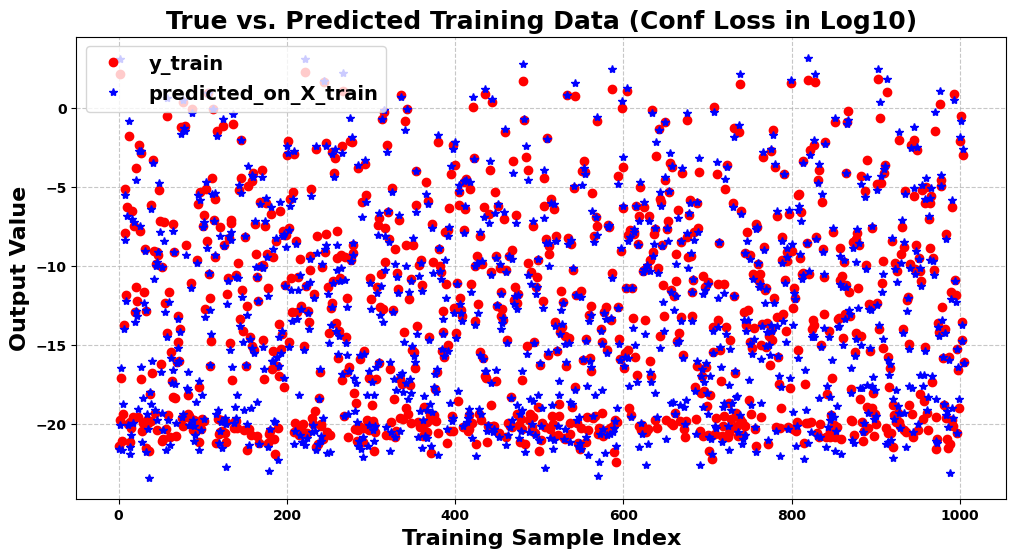

In [ ]:
plt.figure(figsize=(12, 6))  # Increase figure size for better visibility

# Subplot for True vs. Predicted Training Data
plt.subplot(1, 1, 1)  # Single subplot (1 row, 1 column)
# Plot true data
plt.plot(scaler2.inverse_transform(y_train)[:,4], 'ro', markersize=6, label='y_train')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:,4], 'b*', markersize=6, label='predicted_on_X_train')

# Titles and Labels
plt.xlabel('Training Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Training Data (Conf Loss in Log10)', fontsize=18, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()

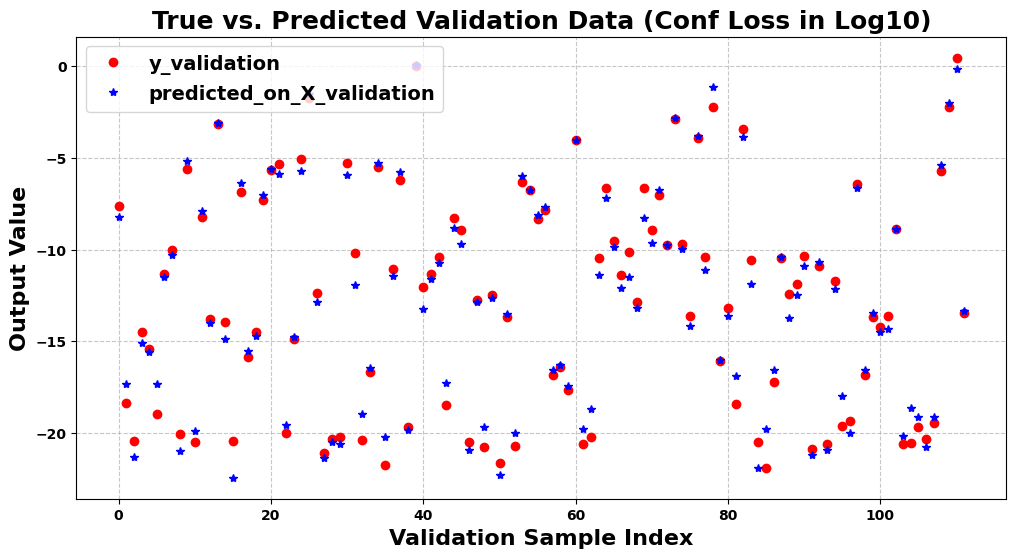

In [ ]:
plt.figure(figsize=(12, 6))  # Increase figure size for better visibility

# Subplot for True vs. Predicted Validation Data
plt.subplot(1, 1, 1)  # Single subplot (1 row, 1 column)
# Plot true data
plt.plot(scaler2.inverse_transform(y_validation)[:,4], 'ro', markersize=6, label='y_validation')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:,4], 'b*', markersize=6, label='predicted_on_X_validation')

# Titles and Labels
plt.xlabel('Validation Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Validation Data (Conf Loss in Log10)', fontsize=18, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()

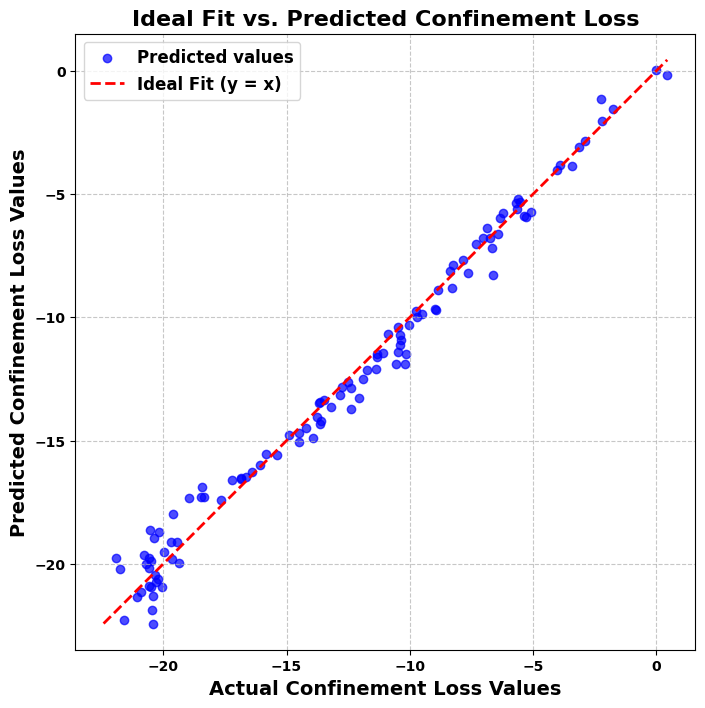

In [ ]:
# Inverse transform for confinement loss (assuming it's at index 3)
actual_conf_loss = scaler2.inverse_transform(y_validation)[:, 4]
predicted_conf_loss = scaler2.inverse_transform(predicted_on_X_validation)[:, 4]

# Create the figure
plt.figure(figsize=(8, 8))

# Scatter plot of predicted vs. actual
plt.scatter(actual_conf_loss, predicted_conf_loss, color='blue', alpha=0.7, label='Predicted values')

# Ideal fit line (y = x)
min_val = min(min(actual_conf_loss), min(predicted_conf_loss))
max_val = max(max(actual_conf_loss), max(predicted_conf_loss))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Ideal Fit (y = x)')

# Axis labels and title
plt.xlabel('Actual Confinement Loss Values', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Confinement Loss Values', fontsize=14, fontweight='bold')
plt.title('Ideal Fit vs. Predicted Confinement Loss', fontsize=16, fontweight='bold')

# Grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.axis('equal')  # Ensures 1:1 aspect ratio

# Show the plot
plt.show()

In [ ]:
conf_loss_comparison_df = pd.DataFrame({
    'Actual confinement loss (in log10)': actual_conf_loss,
    'Predicted confinement loss (in log10)': predicted_conf_loss
})

print(conf_loss_comparison_df.shape)
print(conf_loss_comparison_df.head())

(112, 2)
   Actual confinement loss (in log10)  Predicted confinement loss (in log10)
0                           -7.634241                              -8.217747
1                          -18.350432                             -17.311783
2                          -20.428461                             -21.293100
3                          -14.513133                             -15.074687
4                          -15.397174                             -15.595207


In [ ]:
# Compute evaluation metrics for conf_loss
mse_conf_loss = mean_squared_error(actual_conf_loss, predicted_conf_loss)
mape_conf_loss = mean_absolute_percentage_error(actual_conf_loss, predicted_conf_loss)
r2_conf_loss = r2_score(actual_conf_loss, predicted_conf_loss)

print(f"Mean Squared Error (MSE) for conf_loss: {mse_conf_loss:.6f}")
print(f"Mean Absolute Percentage Error (MAPE) for conf_loss: {mape_conf_loss * 100:.2f}%")
print(f"R² Score for conf_loss: {r2_conf_loss:.4f}")

Mean Squared Error (MSE) for conf_loss: 0.565350
Mean Absolute Percentage Error (MAPE) for conf_loss: 38.03%
R² Score for conf_loss: 0.9842


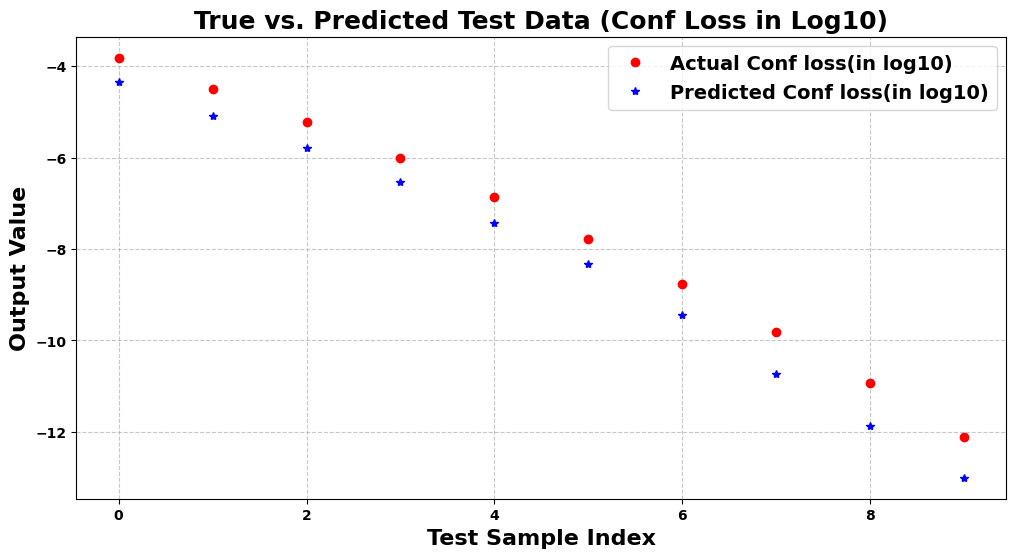

In [ ]:
plt.figure(figsize=(12, 6))

# Subplot for True vs. Predicted Test Data
plt.subplot(1, 1, 1)  # Single subplot
# Plot true data
plt.plot(scaler2.inverse_transform(y_test)[:,4], 'ro', markersize=6, label='Actual Conf loss(in log10)')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:,4], 'b*', markersize=6, label='Predicted Conf loss(in log10)')

# Titles and Labels
plt.xlabel('Test Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Output Value', fontsize=16, fontweight='bold')
plt.title('True vs. Predicted Test Data (Conf Loss in Log10)', fontsize=18, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(loc='best', fontsize=14)

# Show the plot
plt.show()

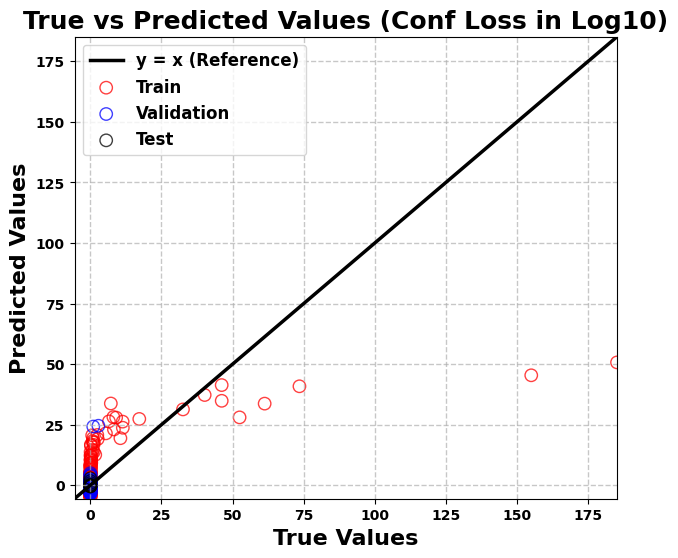

In [ ]:
plt.figure(figsize=(7, 6))

# Scatter Plot
plt.subplot(1, 1, 1)

# Diagonal reference line
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2.5, label="y = x (Reference)")

# Plot scatter points
plt.scatter(xx, yy, label='Train', marker='o', facecolors='none', edgecolors='red', s=80, alpha=0.75)
plt.scatter(xx_validation, yy_validation, label='Validation', marker='o', facecolors='none', edgecolors='blue', s=80, alpha=0.75)
plt.scatter(xx_test, yy_test, label='Test', marker='o', facecolors='none', edgecolors='black', s=80, alpha=0.75)

# Axes limits
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])

# Grid & Labels
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.xlabel('True Values', fontsize=16, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=16, fontweight='bold')
plt.title('True vs Predicted Values (Conf Loss in Log10)', fontsize=18, fontweight='bold')

# Legend
plt.legend(loc='best', fontsize=12)

# Show plot
plt.show()

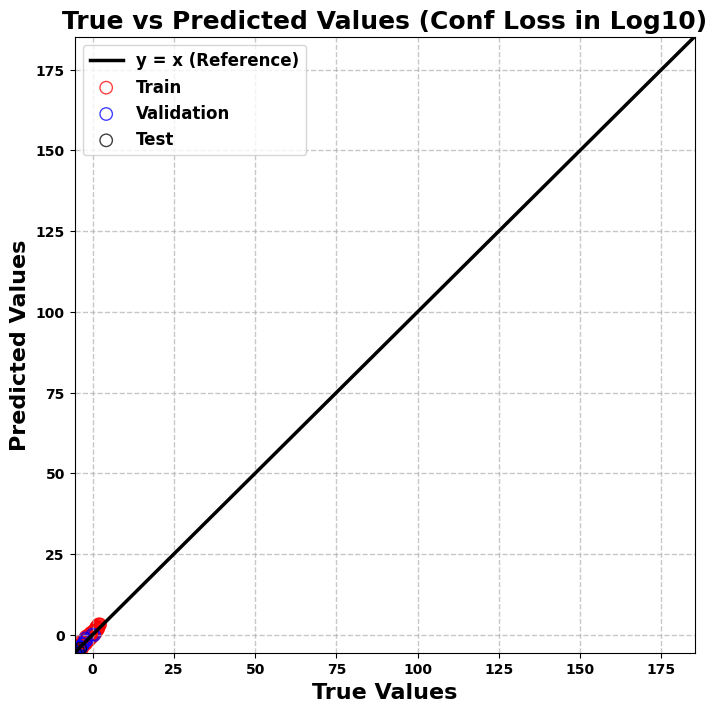

In [ ]:
# Create a larger figure for better clarity
plt.figure(figsize=(8, 8))

# Extract true and predicted values for train, validation, and test sets
xx = scaler2.inverse_transform(y_train)[:, 4]
yy = scaler2.inverse_transform(predicted_on_X_train)[:, 4]
xx_validation = scaler2.inverse_transform(y_validation)[:, 4]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:, 4]
xx_test = scaler2.inverse_transform(y_test)[:, 4]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:, 4]

# Scatter Plot
plt.subplot(1, 1, 1)

# Diagonal reference line
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2.5, label="y = x (Reference)")

# Plot scatter points
plt.scatter(xx, yy, label='Train', marker='o', facecolors='none', edgecolors='red', s=80, alpha=0.75)
plt.scatter(xx_validation, yy_validation, label='Validation', marker='o', facecolors='none', edgecolors='blue', s=80, alpha=0.75)
plt.scatter(xx_test, yy_test, label='Test', marker='o', facecolors='none', edgecolors='black', s=80, alpha=0.75)

# Axes limits
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])

# Grid & Labels
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.xlabel('True Values', fontsize=16, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=16, fontweight='bold')
plt.title('True vs Predicted Values (Conf Loss in Log10)', fontsize=18, fontweight='bold')

# Legend
plt.legend(loc='best', fontsize=12)

# Show plot
plt.show()

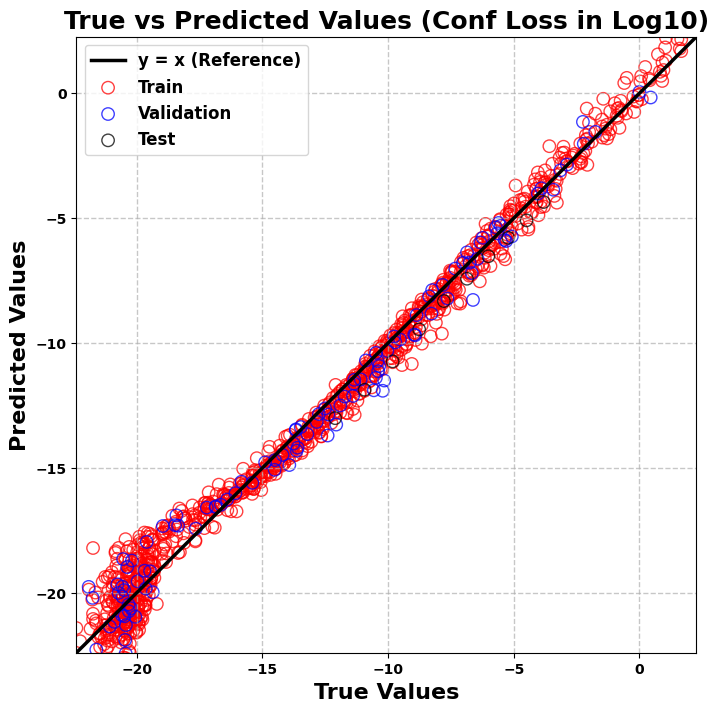

In [ ]:

# Create a larger figure for better clarity
plt.figure(figsize=(8, 8))

# Extract true and predicted values for train, validation, and test sets
xx = scaler2.inverse_transform(y_train)[:, 4]
yy = scaler2.inverse_transform(predicted_on_X_train)[:, 4]
xx_validation = scaler2.inverse_transform(y_validation)[:, 4]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:, 4]
xx_test = scaler2.inverse_transform(y_test)[:, 4]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:, 4]

# Define diagonal reference line
min_val = min(np.min(xx), np.min(xx_validation), np.min(xx_test))
max_val = max(np.max(xx), np.max(xx_validation), np.max(xx_test))
bubble_plot_line_x1y1 = [min_val, max_val]
bubble_plot_line_x2y2 = [min_val, max_val]

# Scatter Plot
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2.5, label="y = x (Reference)")

# Plot scatter points
plt.scatter(xx, yy, label='Train', marker='o', facecolors='none', edgecolors='red', s=80, alpha=0.75)
plt.scatter(xx_validation, yy_validation, label='Validation', marker='o', facecolors='none', edgecolors='blue', s=80, alpha=0.75)
plt.scatter(xx_test, yy_test, label='Test', marker='o', facecolors='none', edgecolors='black', s=80, alpha=0.75)

# Axes limits
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Grid & Labels
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.xlabel('True Values', fontsize=16, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=16, fontweight='bold')
plt.title('True vs Predicted Values (Conf Loss in Log10)', fontsize=18, fontweight='bold')

# Legend
plt.legend(loc='best', fontsize=12)

# Show plot
plt.show()


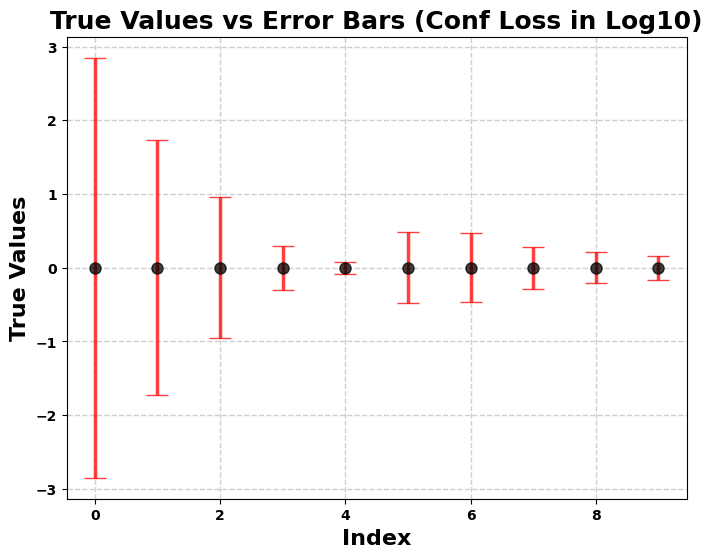

In [ ]:
# Create a larger figure
plt.figure(figsize=(8, 6))

# Error Bar Plot
plt.errorbar(
    x=x_index, y=true_values, yerr=error_values, fmt='o',
    color='black', ecolor='red', elinewidth=2.5, capsize=8, markersize=8, alpha=0.75
)

# Grid & Labels
plt.grid(linestyle='--', linewidth=1, alpha=0.6)
plt.xlabel('Index', fontsize=16, fontweight='bold')
plt.ylabel('True Values', fontsize=16, fontweight='bold')
plt.title('True Values vs Error Bars (Conf Loss in Log10)', fontsize=18, fontweight='bold')

# Show plot
plt.show()

In [ ]:
print("o/p of test set:           \n", (scaler2.inverse_transform(y_test)[:,4]))
print("predicted o/p of test set: \n", (scaler2.inverse_transform(predicted_on_X_test)[:,4]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))
print()

o/p of test set:           
 [ -3.81105465  -4.48848561  -5.2198635   -6.00930116  -6.86083904
  -7.77797323  -8.76290889  -9.81548743 -10.93197378 -12.1044758 ]
predicted o/p of test set: 
 [ -4.352326   -5.0859585  -5.7795935  -6.5234175  -7.4231296  -8.31713
  -9.451838  -10.731801  -11.868269  -13.006463 ]
mse_test_set:  0.0002219804426177995



In [ ]:
# Inverse transform the scaled data
y_test_actual_confloss_log10 = scaler2.inverse_transform(y_test)[:, 4]
y_test_predicted_confloss_log10 = scaler2.inverse_transform(predicted_on_X_test)[:, 4]

# Store both in a single DataFrame
df_confloss_log10 = pd.DataFrame({
    "Actual Output": y_test_actual_confloss_log10,
    "Predicted Output": y_test_predicted_confloss_log10
})

print(df_confloss_log10)

   Actual Output  Predicted Output
0      -3.811055         -4.352326
1      -4.488486         -5.085958
2      -5.219864         -5.779593
3      -6.009301         -6.523417
4      -6.860839         -7.423130
5      -7.777973         -8.317130
6      -8.762909         -9.451838
7      -9.815487        -10.731801
8     -10.931974        -11.868269
9     -12.104476        -13.006463


In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test_actual_confloss_log10, y_test_predicted_confloss_log10)
mape = mean_absolute_percentage_error(y_test_actual_confloss_log10, y_test_predicted_confloss_log10)
r2 = r2_score(y_test_actual_confloss_log10, y_test_predicted_confloss_log10)

# Print results
print("For Confidence loss (log10):")
print("\nMean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R² Score:", r2)

For Confidence loss (log10):

Mean Squared Error (MSE): 0.48389053645258817
Mean Absolute Percentage Error (MAPE): 0.09513349449828948
R² Score: 0.9313234859845524


[1.54506e-04 3.24724e-05 6.02749e-06 9.78811e-07 1.37772e-07 1.66735e-08
 1.72620e-09 1.52937e-10 1.16957e-11 7.86184e-13]
[ 2.848528    1.7327385   0.95931745  0.30042887 -0.07970915 -0.48262298
 -0.47135097 -0.2829517  -0.21013409 -0.16110979]


Text(0.5, 1.0, 'conf-loss-without-log10')

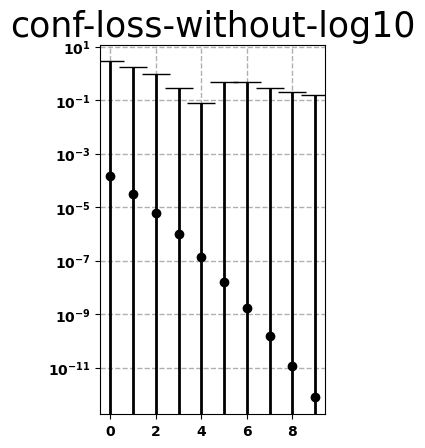

In [ ]:
#################   plotting graphs together - conf-loss-without/with-log10  ################
###############################################################

plt.figure()
plt.subplot(121)
true_values = scaler2.inverse_transform(y_test)[:,3]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:,3]
print(true_values)
print(predicted_values)
x_index = [i for i in range(len(true_values))]
#error_values = predicted_values - true_values
# Calculate absolute error for yerr
error_values = np.abs(predicted_values - true_values)
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black',
                    ecolor='black', elinewidth=2, capsize=10)
plt.yscale('log')
plt.grid(linestyle='--', linewidth=1)
plt.title('conf-loss-without-log10', fontsize=25)

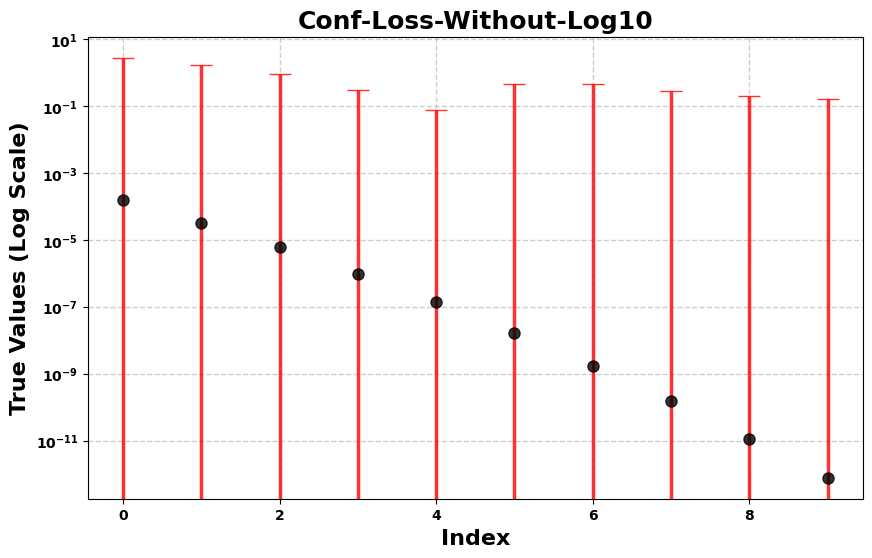

In [ ]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Error Bar Plot with Log Scale
plt.errorbar(
    x=x_index, y=true_values, yerr=error_values, fmt='o',
    color='black', ecolor='red', elinewidth=2.5, capsize=8, markersize=8, alpha=0.8
)

# Apply Log Scale
plt.yscale('log')

# Grid & Labels
plt.grid(linestyle='--', linewidth=1, alpha=0.6)
plt.xlabel('Index', fontsize=16, fontweight='bold')
plt.ylabel('True Values (Log Scale)', fontsize=16, fontweight='bold')
plt.title('Conf-Loss-Without-Log10', fontsize=18, fontweight='bold')

# Show plot
plt.show()

[1.54506e-04 3.24724e-05 6.02749e-06 9.78811e-07 1.37772e-07 1.66735e-08
 1.72620e-09 1.52937e-10 1.16957e-11 7.86184e-13]
[4.4429773e-05 8.2042998e-06 1.6611411e-06 2.9962808e-07 3.7745956e-08
 4.8180344e-09 3.5331532e-10 1.8543811e-11 1.3543503e-12 9.8522847e-14]


Text(0.5, 1.0, 'conf-loss-with-log10')

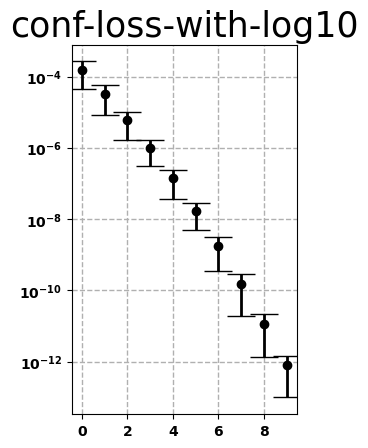

In [ ]:
plt.subplot(122)
true_values = 10**(scaler2.inverse_transform(y_test)[:,4])
predicted_values = 10**(scaler2.inverse_transform(predicted_on_X_test)[:,4])
print(true_values)
print(predicted_values)
x_index = [i for i in range(len(true_values))]
#error_values = predicted_values - true_values
# Calculate absolute error for yerr
error_values = np.abs(predicted_values - true_values)
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black',
                    ecolor='black', elinewidth=2, capsize=10)
plt.yscale('log')
plt.grid(linestyle='--', linewidth=1)
plt.title('conf-loss-with-log10', fontsize=25)

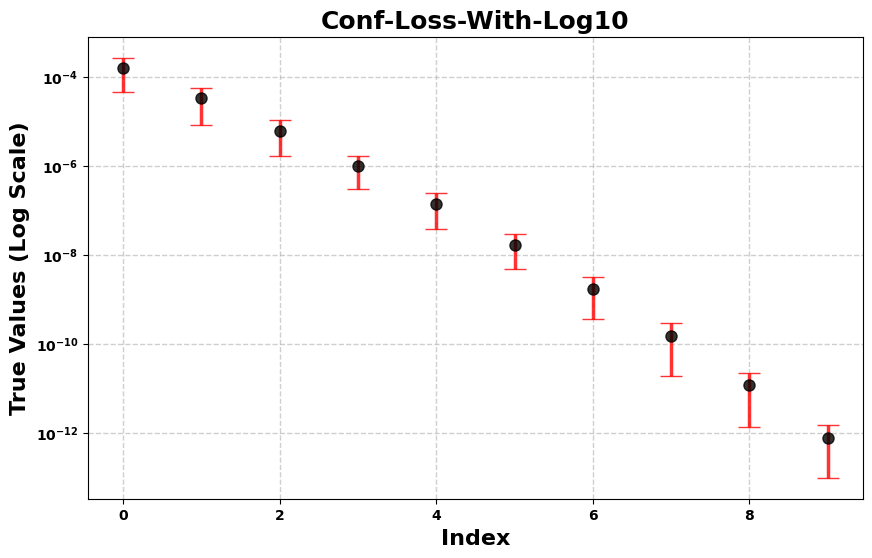

In [ ]:
plt.figure(figsize=(10, 6))

# Error Bar Plot with Log Scale
plt.errorbar(
    x=x_index, y=true_values, yerr=error_values, fmt='o',
    color='black', ecolor='red', elinewidth=2.5, capsize=8, markersize=8, alpha=0.8
)

# Apply Log Scale
plt.yscale('log')

# Grid & Labels
plt.grid(linestyle='--', linewidth=1, alpha=0.6)
plt.xlabel('Index', fontsize=16, fontweight='bold')
plt.ylabel('True Values (Log Scale)', fontsize=16, fontweight='bold')
plt.title('Conf-Loss-With-Log10', fontsize=18, fontweight='bold')

# Show plot
plt.show()